# Data Exploration

In [2]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("../data/sba_national.csv", low_memory=False)
print(df.shape)
df.sample(3)

(899164, 27)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
71814,1539855008,Emily's Family Corp,BROOKLYN,NY,11209,HSBC BK USA NATL ASSOC,VA,445110,15-Nov-05,2006,...,N,N,28-Dec-07,31-Dec-05,"$70,000.00",$0.00,CHGOFF,"$61,470.00","$70,000.00","$35,000.00"
551364,5416934010,SALON ON THE CREEK,COPPELL,TX,75019,"READYCAP LENDING, LLC",CA,812112,23-May-02,2002,...,0,N,NaN,31-Mar-03,"$850,000.00",$0.00,P I F,$0.00,"$850,000.00","$637,500.00"
190301,2348365005,Pet's Lounge,FULLERTON,CA,92832,BBCN BANK,CA,561310,22-Mar-07,2007,...,N,N,5-Jun-08,31-Mar-07,"$20,000.00",$0.00,CHGOFF,"$19,096.00","$20,000.00","$17,000.00"


In [5]:
rep = ProfileReport(df)
rep.to_file(output_file="../html/sba_national_eda.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 24.39it/s]


In [4]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [5]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [6]:
df.nunique()

LoanNr_ChkDgt        899164
Name                 779583
City                  32581
State                    51
Zip                   33611
Bank                   5802
BankState                56
NAICS                  1312
ApprovalDate           9859
ApprovalFY               52
Term                    412
NoEmp                   599
NewExist                  3
CreateJob               246
RetainedJob             358
FranchiseCode          2768
UrbanRural                3
RevLineCr                18
LowDoc                    8
ChgOffDate             6448
DisbursementDate       8472
DisbursementGross    118859
BalanceGross             15
MIS_Status                2
ChgOffPrinGr          83165
GrAppv                22128
SBA_Appv              38326
dtype: int64

In [7]:
df.iloc[:,1:].describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,31184.159152,263318.312760,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


## LoanNr_ChkDgt
Identificador - Clave principal.

In [8]:
nnan = df["LoanNr_ChkDgt"].isnull().sum()
nvar = df["LoanNr_ChkDgt"].nunique()
pvar = round((nvar / df.shape[0]) * 100, 1)

print(f"Numero de Nulos: {nnan}")
print(f"Valores Distintos: {nvar}")
print(f"Porcentaje Distintos: {pvar}%")

Numero de Nulos: 0
Valores Distintos: 899164
Porcentaje Distintos: 100.0%


La variable LoanNr_ChkDgt al ser la clave principal tiene 100% de valores distintos, y no aportaria al modelo predictivo.

## Name
Nombre del prestatario.

In [9]:
nnan = df["Name"].isnull().sum()
nvar = df["Name"].nunique()
pvar = round((nvar / df.shape[0]) * 100, 1)

print(f"Numero de Nulos: {nnan}")
print(f"Valores Distintos: {nvar}")
print(f"Porcentaje Distintos: {pvar}%")

Numero de Nulos: 14
Valores Distintos: 779583
Porcentaje Distintos: 86.7%


La variable Name tiene una elevada cardinalidad, con 86.7% de valores distintos, y no aportaria al modelo predictivo.

## City
Ciudad del prestatario.

In [10]:
nnan = df["City"].isnull().sum()
nvar = df["City"].nunique()
pvar = round((nvar / df.shape[0]) * 100, 1)

print(f"Numero de Nulos: {nnan}")
print(f"Valores Distintos: {nvar}")
print(f"Porcentaje Distintos: {pvar}%")

Numero de Nulos: 30
Valores Distintos: 32581
Porcentaje Distintos: 3.6%


La variable City tiene 3.6% de valores distintos, que serian 32581 diferentes ciudades, y no aportaria al modelo predictivo.

## State
Estado del prestatario.

In [11]:
nnan = df["State"].isnull().sum()
nvar = df["State"].nunique()
pvar = round((nvar / df.shape[0]) * 100, 1)

print(f"Numero de Nulos: {nnan}")
print(f"Valores Distintos: {nvar}")
print(f"Porcentaje Distintos: {pvar}%")

Numero de Nulos: 14
Valores Distintos: 51
Porcentaje Distintos: 0.0%


In [12]:
df_state = df.groupby(["State","MIS_Status"])["State"].count()
df_state = df_state.unstack(level=1)
df_state = pd.DataFrame(df_state).rename_axis("Index", axis=1).reset_index()

df_state = df_state.rename(columns={"CHGOFF":"Default", "P I F":"Paid"})
df_state = df_state.fillna(0)
df_state["Count"] = df_state["Default"] + df_state["Paid"]
df_state["Frequency"] = round((df_state["Count"] / df_state["Count"].sum()) * 100, 1)
df_state.sort_values("Count", ascending=False).head()

Index,State,Default,Paid,Count,Frequency
4,CA,24160,106328,130488,14.5
43,TX,13265,57136,70401,7.8
34,NY,11450,45944,57394,6.4
9,FL,11274,29918,41192,4.6
38,PA,5089,29712,34801,3.9


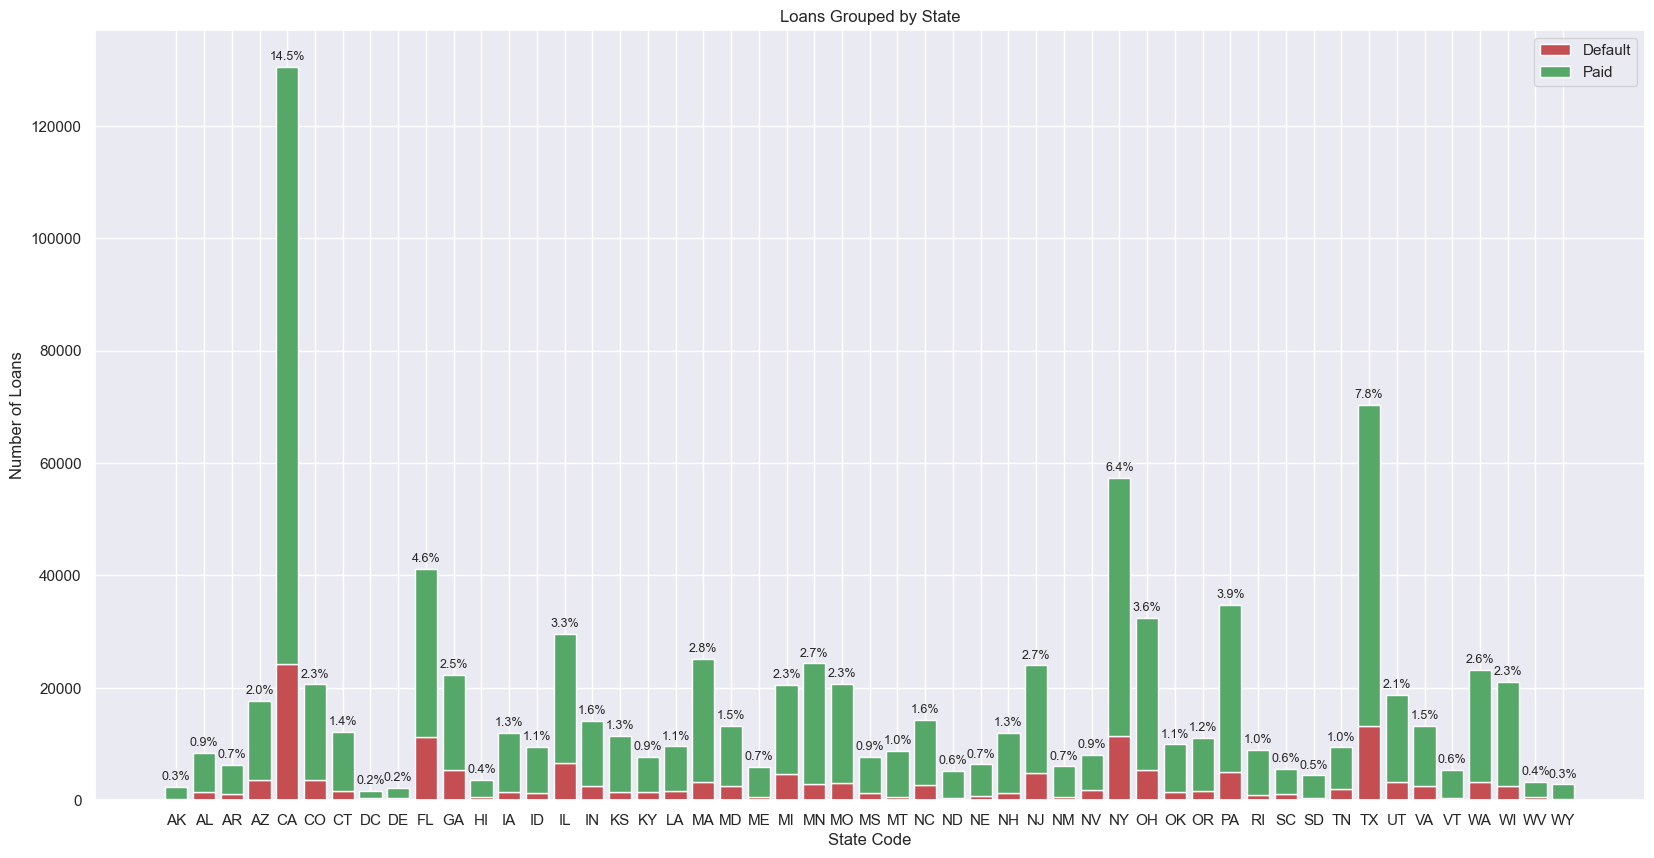

In [18]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")
plt.bar(df_state["State"], df_state["Default"], label="Default", color="r")
plt.bar(df_state["State"], df_state["Paid"], bottom=df_state["Default"], label="Paid", color="g")

for num in range(len(df_state)):
    plt.annotate(str(df_state["Frequency"][num])+"%",
                 xy=(num, df_state["Count"][num]),
                 xytext=(0, 5), textcoords="offset points", ha="center", size=9)

plt.title("Loans Grouped by State")
plt.xlabel("State Code")
plt.ylabel("Number of Loans")
plt.legend()
plt.show()

La variable State es dicreta, cuenta con 51 estados diferentes y podria ser una feature importante en el modelo predictivo.

## Zip
Código postal del prestatario.

In [19]:
nnan = df["Zip"].isnull().sum()
nvar = df["Zip"].nunique()
pvar = round((nvar / df.shape[0]) * 100, 1)

print(f"Numero de Nulos: {nnan}")
print(f"Valores Distintos: {nvar}")
print(f"Porcentaje Distintos: {pvar}%")

Numero de Nulos: 0
Valores Distintos: 33611
Porcentaje Distintos: 3.7%


La variable Zip tiene 3.7% de valores distintos, que serian 33611 diferentes codigos postales, y no aportaria al modelo predictivo.

## Bank
Nombre del banco.

In [20]:
nnan = df["Bank"].isnull().sum()
nvar = df["Bank"].nunique()
pvar = round((nvar / df.shape[0]) * 100, 1)

print(f"Numero de Nulos: {nnan}")
print(f"Valores Distintos: {nvar}")
print(f"Porcentaje Distintos: {pvar}%")

Numero de Nulos: 1559
Valores Distintos: 5802
Porcentaje Distintos: 0.6%


La variable Bank tiene 0.6% de valores distintos, que serian 5802 diferentes bancos, y no aportaria al modelo predictivo.

## BankState
Estado del banco.

In [21]:
nnan = df["BankState"].isnull().sum()
nvar = df["BankState"].nunique()
pvar = round((nvar / df.shape[0]) * 100, 1)

print(f"Numero de Nulos: {nnan}")
print(f"Valores Distintos: {nvar}")
print(f"Porcentaje Distintos: {pvar}%")

Numero de Nulos: 1566
Valores Distintos: 56
Porcentaje Distintos: 0.0%


In [22]:
df_bank = df.groupby(["BankState","MIS_Status"])["BankState"].count()
df_bank = df_bank.unstack(level=1)
df_bank = pd.DataFrame(df_bank).rename_axis("Index",axis=1).reset_index()

df_bank = df_bank.rename(columns={"CHGOFF":"Default", "P I F":"Paid"})
df_bank = df_bank.fillna(0)
df_bank["Count"] = df_bank["Default"] + df_bank["Paid"]
df_bank["Frequency"] = round((df_bank["Count"] / df_bank["Count"].sum()) * 100, 1)
df_bank.sort_values("Count", ascending=False).head()

Index,BankState,Default,Paid,Count,Frequency
5,CA,26035.0,91999.0,118034.0,13.2
30,NC,23314.0,56141.0,79455.0,8.9
17,IL,14688.0,51176.0,65864.0,7.4
38,OH,9274.0,49156.0,58430.0,6.5
45,SD,9172.0,41893.0,51065.0,5.7


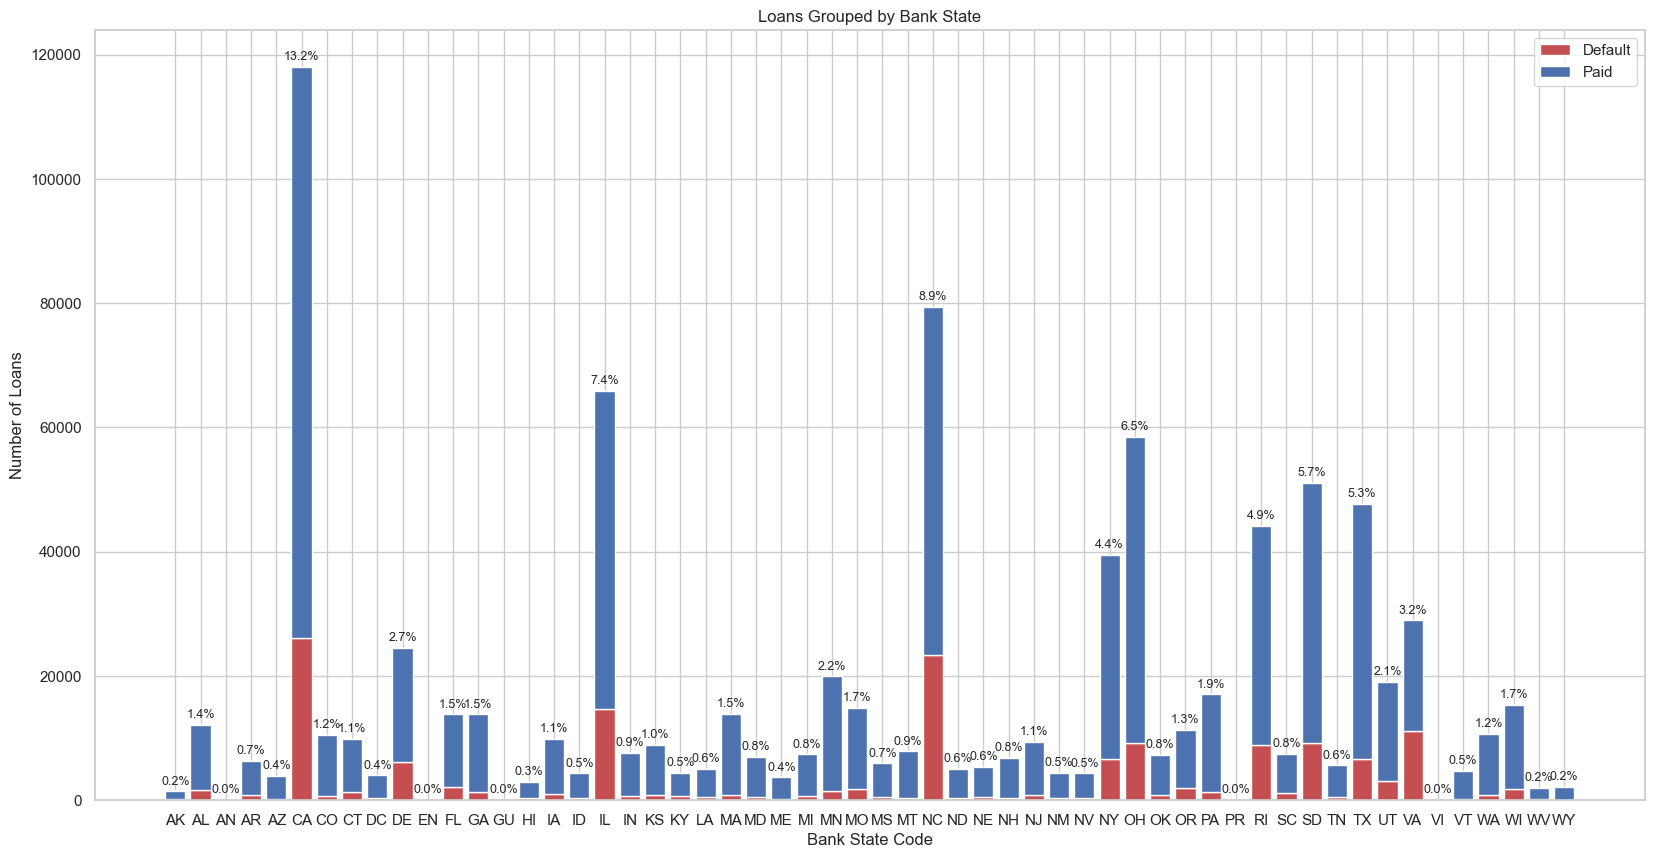

In [23]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
plt.bar(df_bank["BankState"], df_bank["Default"], label="Default", color="r")
plt.bar(df_bank["BankState"], df_bank["Paid"], bottom=df_bank["Default"], label="Paid", color="b")

for num in range(len(df_bank)):
    plt.annotate(str(df_bank["Frequency"][num])+"%",
                 xy=(num, df_bank["Count"][num]),
                 xytext=(0, 5), textcoords="offset points", ha="center", size=9)

plt.title("Loans Grouped by Bank State")
plt.xlabel("Bank State Code")
plt.ylabel("Number of Loans")
plt.legend()
plt.show()

La variable BankState es dicreta, cuenta con 56 estados diferentes y podria ser una feature importante en el modelo predictivo.

## NAICS
Código del sistema de clasificación de la industria de América del Norte.

In [24]:
sector = {"Code": ["11", "21", "22", "23", "31", "32", "33", "42", "44", "45", "48", "49",
                   "51", "52", "53", "54", "55", "56", "61", "62", "71", "72", "81", "92"],
          "Sector": ["Agriculture, forestry, fishing and hunting",
                     "Mining, quarrying, and oil and gas extraction",
                     "Utilities",
                     "Construction",
                     "Manufacturing",
                     "Manufacturing",
                     "Manufacturing",
                     "Wholesale trade",
                     "Retail trade",
                     "Retail trade",
                     "Transportation and warehousing",
                     "Transportation and warehousing",
                     "Information",
                     "Finance and insurance",
                     "Real estate and rental and leasing",
                     "Professional, scientific, and technical services",
                     "Management of companies and enterprises",
                     "Administrative and support and waste management and remediation services",
                     "Educational services",
                     "Health care and social assistance",
                     "Arts, entertainment, and recreation",
                     "Accommodation and food services",
                     "Other services (except public administration)",
                     "Public administration"]}

df_sector = pd.DataFrame(sector)
df_sector.shape

(24, 2)

In [25]:
df_naics = df[["NAICS", "MIS_Status"]].copy()
df_naics["NAICS"] = df_naics["NAICS"].astype(str).str[0:2]
df_naics = df_naics.merge(df_sector, left_on="NAICS", right_on="Code", how="left")

df_naics["Sector"] = df_naics["Sector"].fillna("[Unallocated sector]")
df_naics = df_naics.rename(columns={"MIS_Status":"Default"})
df_naics["Default"] = np.where(df_naics["Default"]=="P I F", 0, 1)
df_naics = df_naics[["Code", "Sector", "Default"]]
df_naics.iloc[[0,1,-2,-1],:]

,Code,Sector,Default
0,45,Retail trade,0
1,72,Accommodation and food services,0
899162,NaN,[Unallocated sector],1
899163,NaN,[Unallocated sector],0


In [26]:
nvar = df_naics["Sector"].nunique() - 1 # - unallocated sector
nnan = df_naics["Code"].isnull().sum()
pnan = round((nnan / df.shape[0]) * 100, 1)

print(f"Valores Distintos: {nvar}")
print(f"Numero de Nulos: {nnan}")
print(f"Porcentaje de Nulos: {pnan}%")

Valores Distintos: 20
Numero de Nulos: 201948
Porcentaje de Nulos: 22.5%


In [27]:
df_sector = df_naics.groupby("Sector")["Sector"].count()
df_sector = df_sector.rename("Count").reset_index()
df_sector = pd.DataFrame(df_sector)

df_sector["Frequency"] = round((df_sector["Count"] / df_naics.shape[0]) * 100, 1)
df_sector.sort_values("Count", ascending=False).head()

,Sector,Count,Frequency
20,[Unallocated sector],201948,22.5
16,Retail trade,127251,14.2
12,Other services (except public administration),72618,8.1
13,"Professional, scientific, and technical services",68170,7.6
10,Manufacturing,68029,7.6


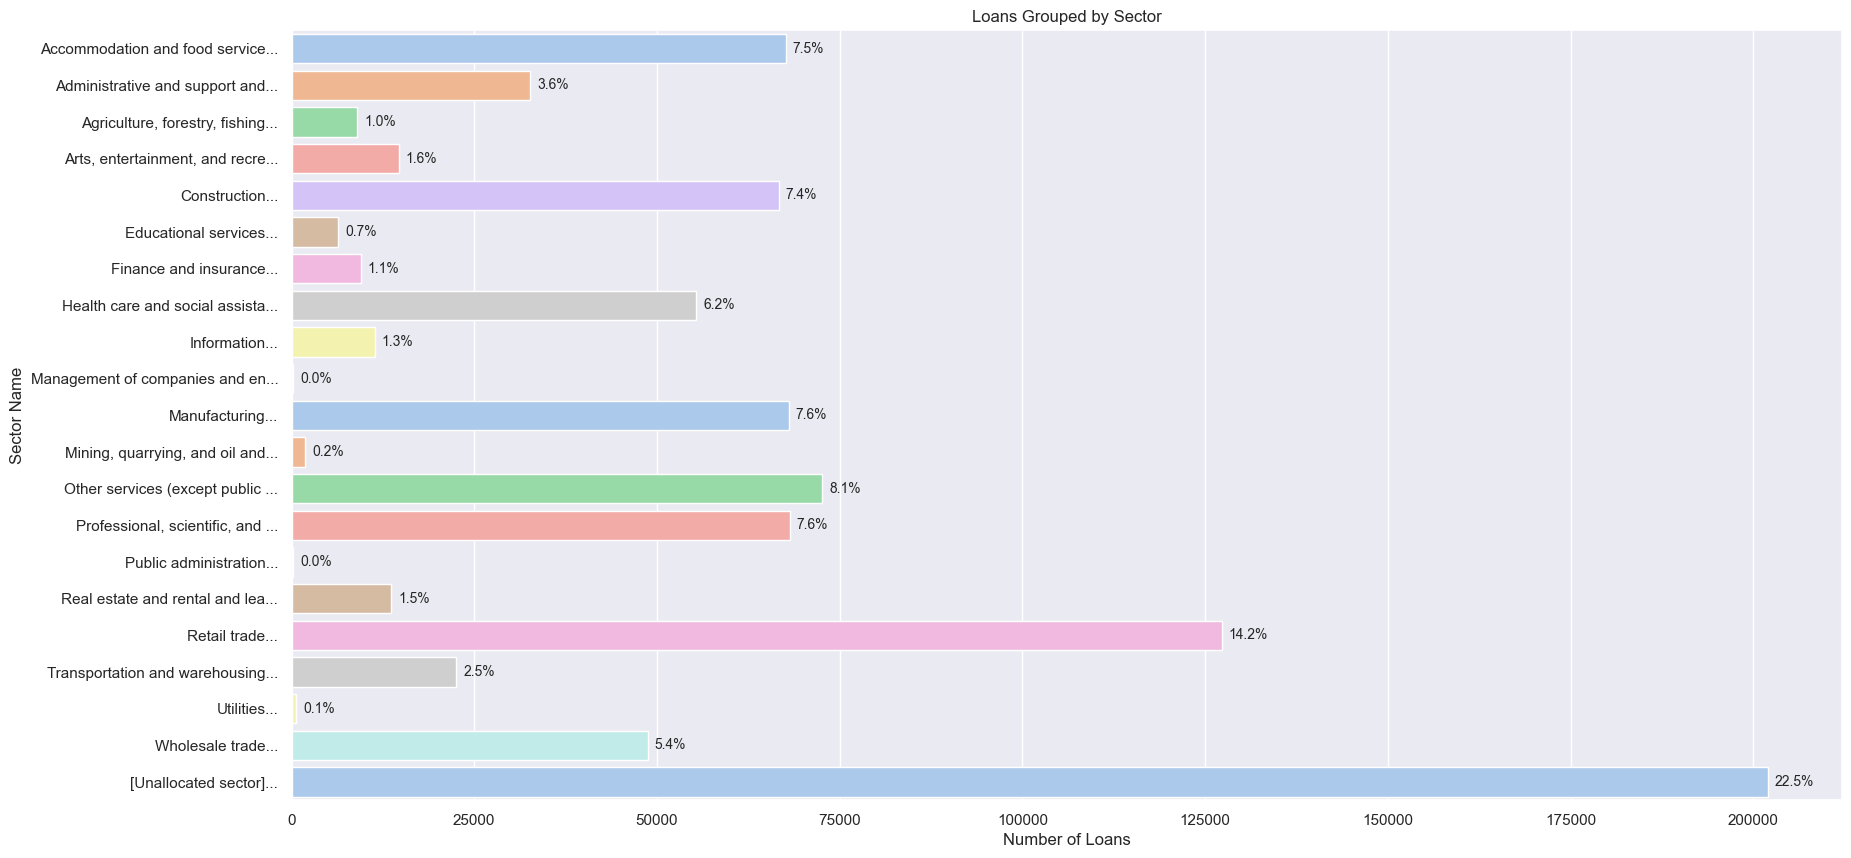

In [28]:
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
df_sector["Sector_"] = df_sector["Sector"].str[0:30] + "..."
sns.barplot(data=df_sector, x="Count", y="Sector_", palette="pastel")

for num in range(len(df_sector)):
    plt.annotate(str(df_sector["Frequency"][num])+"%",
                 xy=(df_sector["Count"][num], num),
                 xytext=(5, 0), textcoords="offset points", va="center", size=10)

plt.title("Loans Grouped by Sector")
plt.xlabel("Number of Loans")
plt.ylabel("Sector Name")
plt.show()

La variable NAICS es dicreta, tiene 20 sectores diferentes y aunque tiene 22.5% de NaNs se evaluara su aporte al modelo predictivo.

## ApprovalDate
Fecha de emisión del compromiso de la SBA.

In [76]:
nvar = df["ApprovalDate"].nunique()
nnan = df["ApprovalDate"].isnull().sum()
pnan = round((nnan / df.shape[0]) * 100, 1)

print(f"Valores Distintos: {nvar}")
print(f"Numero de Nulos: {nnan}")
print(f"Porcentaje de Nulos: {pnan}%")

Valores Distintos: 9859
Numero de Nulos: 0
Porcentaje de Nulos: 0.0%


In [77]:
def calculate_date(app_date):
    date = app_date.split("-")
    year = date[2]
    if year == "00":
        year = "20" + year
    elif int(year) > 14:
        year = "19" + year
    else:
        year = "20" + year
    return f"{date[0]}-{date[1]}-{year}"

In [78]:
df_apdt = df[["ApprovalDate", "MIS_Status"]].copy()
df_apdt["AppDate"] = pd.to_datetime(df_apdt["ApprovalDate"].apply(calculate_date))
df_apdt["AppYear"] = df_apdt["AppDate"].dt.year

df_apdt = df_apdt.groupby(["AppYear"])["AppYear"].count()
df_apdt = df_apdt.rename("Count").reset_index()
df_apdt = pd.DataFrame(df_apdt)

df_apdt["Frequency"] = round((df_apdt["Count"] / df_apdt["Count"].sum()) * 100, 1)
df_apdt.sort_values("Count", ascending=False).head()

,AppYear,Count,Frequency
42,2006,77247,8.6
41,2005,75115,8.4
40,2004,71281,7.9
43,2007,67016,7.5
39,2003,62247,6.9


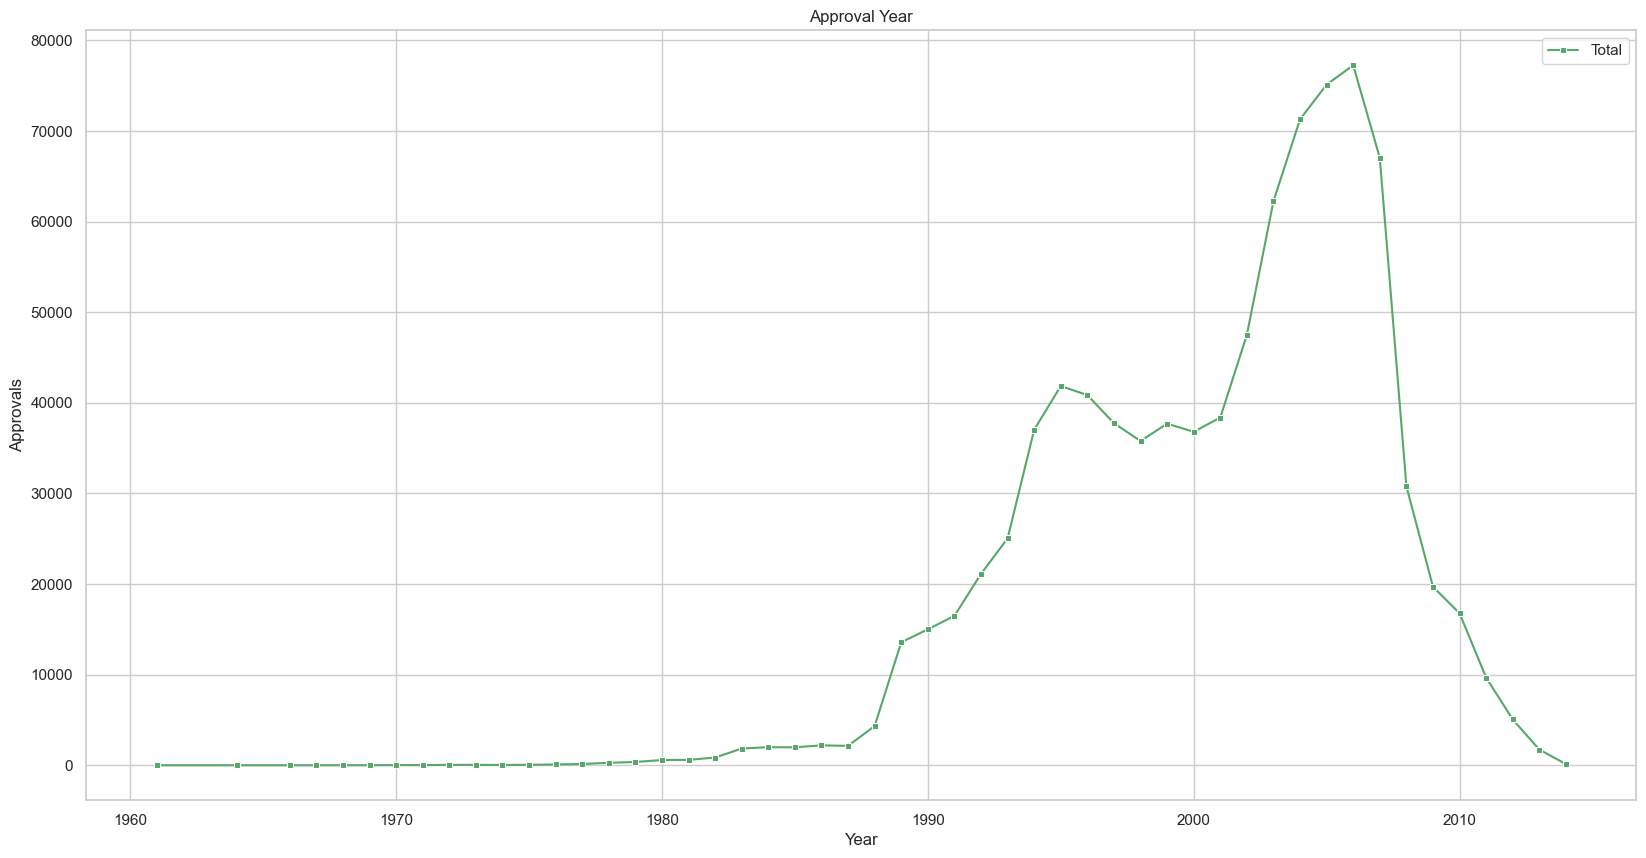

In [79]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.lineplot(data=df_apdt, x="AppYear", y="Count", label="Total", color="g", linewidth=1.5, linestyle="-", marker="s", markersize=4)

plt.title("Approval Year")
plt.xlabel("Year")
plt.ylabel("Approvals")
plt.legend()
plt.show()

La variable ApprovalDate es de tipo fecha sin nulos y podria ser una feature importante en el modelo predictivo.

## ApprovalFY
Año fiscal del compromiso.

In [51]:
nvar = df["ApprovalFY"].nunique()
nnan = df["ApprovalFY"].isnull().sum()
pnan = round((nnan / df.shape[0]) * 100, 1)

print(f"Valores Distintos: {nvar}")
print(f"Numero de Nulos: {nnan}")
print(f"Porcentaje de Nulos: {pnan}%")

Valores Distintos: 52
Numero de Nulos: 0
Porcentaje de Nulos: 0.0%


In [52]:
df_app = df.groupby("ApprovalFY")["ApprovalFY"].count()
df_app = df_app.rename("CountFY").reset_index()
df_app = pd.DataFrame(df_app)

df_app["ApprovalFY"] = df_app["ApprovalFY"].str[0:4].astype(int)
df_app = df_app.merge(df_apdt, left_on="ApprovalFY", right_on="AppYear", how="inner")

df_app = df_app.rename(columns={"ApprovalFY":"Year", "CountFY":"ApprovalFY", "Count":"ApprovalDate"})
df_app = df_app.loc[:,["Year","ApprovalFY","ApprovalDate"]]
df_app.sort_values("ApprovalFY", ascending=False).head()

,Year,ApprovalFY,ApprovalDate
40,2005,77525,75115
41,2006,76040,77247
42,2007,71876,67016
39,2004,68290,71281
38,2003,58193,62247


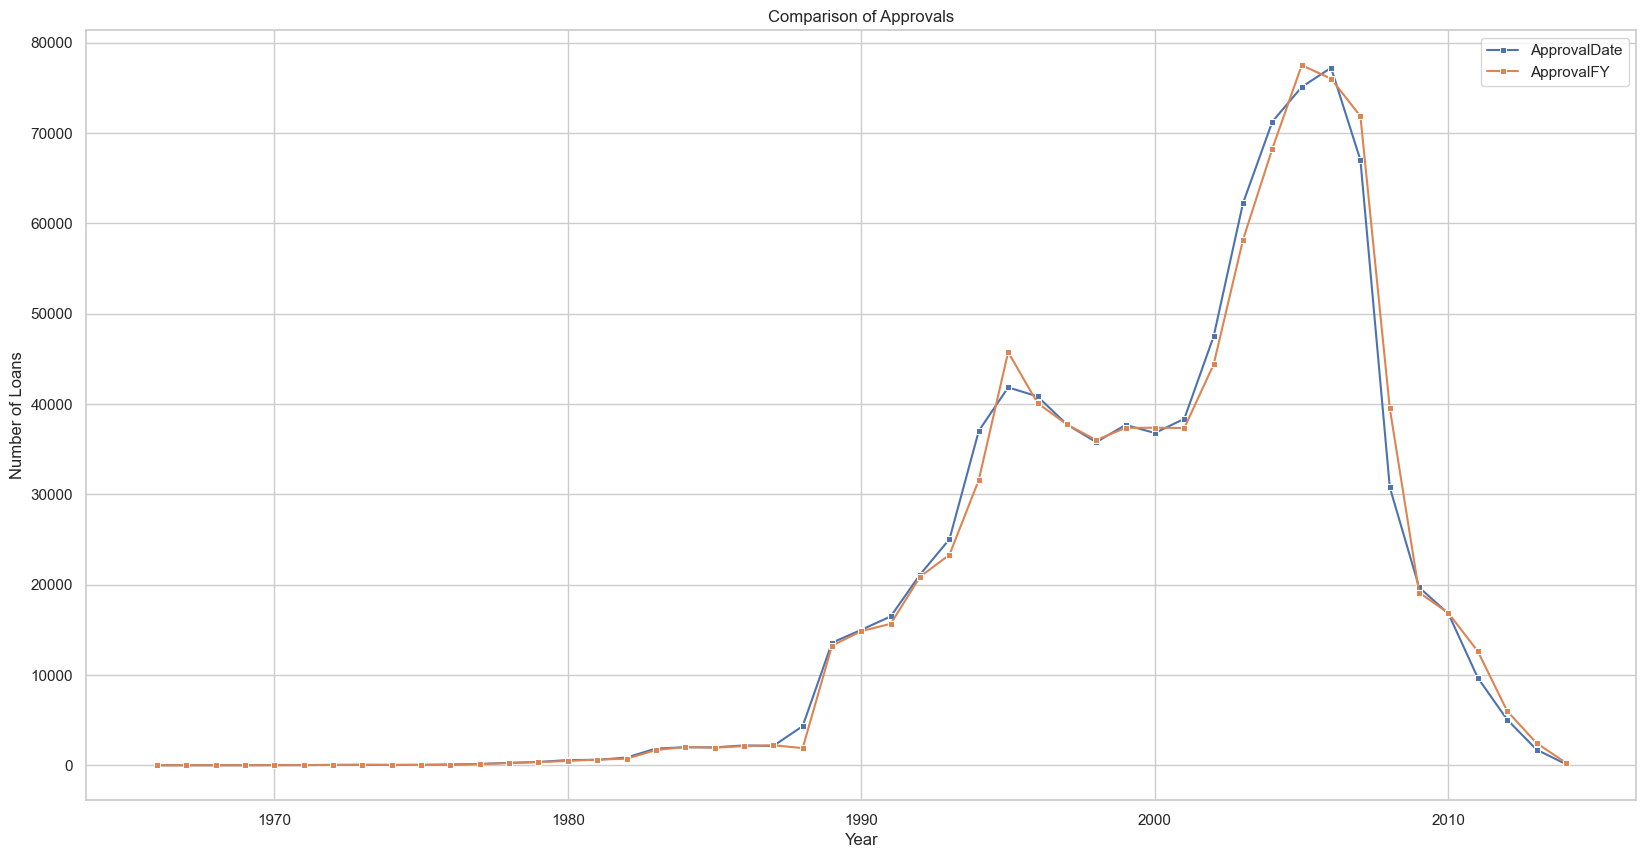

In [53]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.lineplot(data=df_app, x="Year", y="ApprovalDate", label="ApprovalDate", linewidth=1.5, linestyle="-", marker="s", markersize=4)
sns.lineplot(data=df_app, x="Year", y="ApprovalFY", label="ApprovalFY", linewidth=1.5, linestyle="-", marker="s", markersize=4)

plt.title("Comparison of Approvals")
plt.xlabel("Year")
plt.ylabel("Number of Loans")
plt.legend()
plt.show()

La variable ApprovalFY es de tipo entero sin nulos, se comporta similarmente a ApprovalDate, y no aportaria al modelo predictivo.

## Term
Plazo del préstamo en meses.

In [54]:
nnan = df["Term"].isnull().sum()
nvar = df["Term"].nunique()
pvar = round((nvar / df.shape[0]) * 100, 1)

print(f"Numero de Nulos: {nnan}")
print(f"Valores Distintos: {nvar}")
print(f"Porcentaje Distintos: {pvar}%")

Numero de Nulos: 0
Valores Distintos: 412
Porcentaje Distintos: 0.0%


In [55]:
df_term = df.groupby(["Term","MIS_Status"])["Term"].count()
df_term = df_term.unstack(level=1)
df_term = pd.DataFrame(df_term).rename_axis("Index", axis=1).reset_index()

df_term = df_term.rename(columns={"CHGOFF":"Default", "P I F":"Paid"})
df_term = df_term.fillna(0)
df_term["Count"] = df_term["Default"] + df_term["Paid"]
df_term["Frequency"] = round((df_term["Count"] / df_term["Count"].sum()) * 100, 1)
df_term.sort_values("Count", ascending=False).head()

Index,Term,Default,Paid,Count,Frequency
84,84,1948.0,226972.0,228920.0,25.5
60,60,2459.0,87410.0,89869.0,10.0
240,240,192.0,85777.0,85969.0,9.6
120,120,1011.0,76613.0,77624.0,8.7
300,300,60.0,44639.0,44699.0,5.0


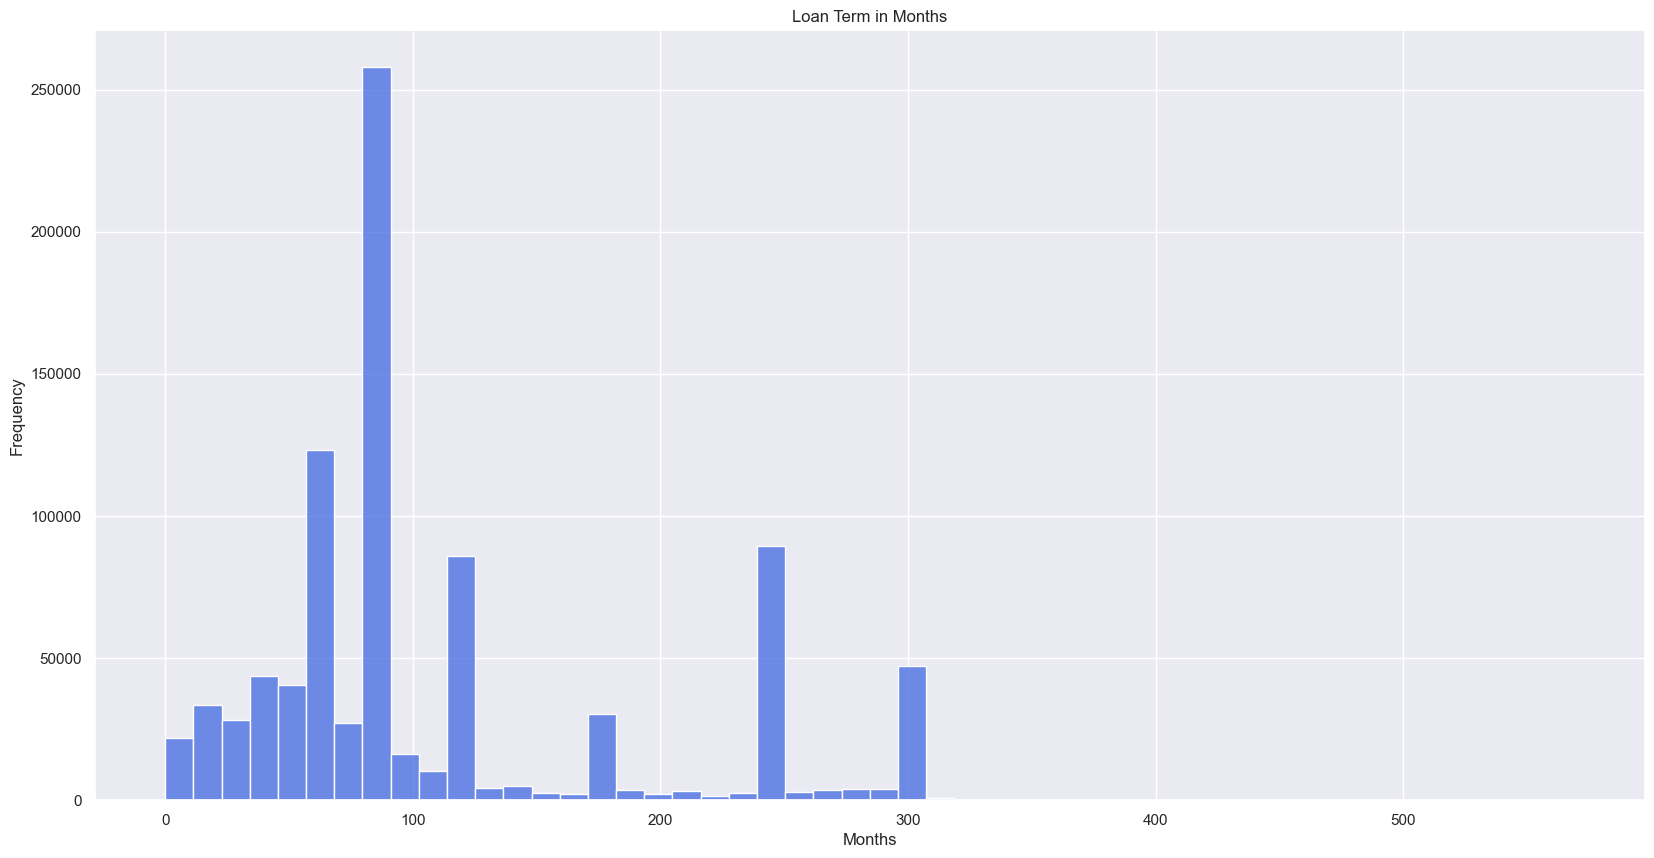

In [56]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.histplot(df["Term"], color="royalblue", bins=50)

plt.title("Loan Term in Months")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.show()

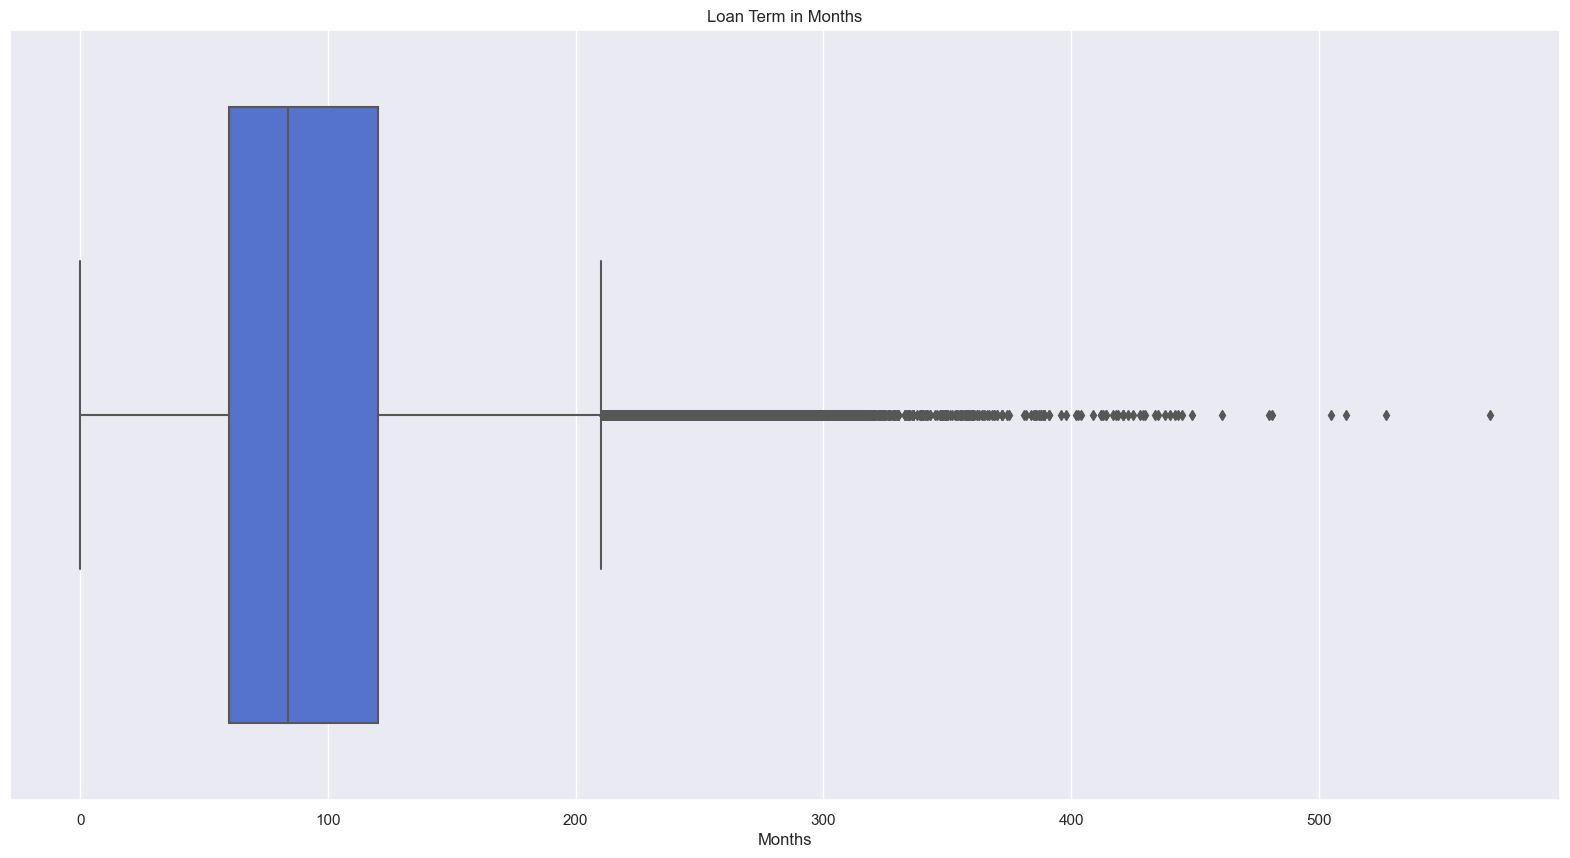

In [57]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.boxplot(data=df, x="Term", color="royalblue")

plt.title("Loan Term in Months")
plt.xlabel("Months")
plt.show()

La variable Term es discreta numerica, cuenta con 412 meses diferentes y podria ser una feature importante en el modelo predictivo.

## NoEmp
Número de empleados de la empresa.

In [58]:
nnan = df["NoEmp"].isnull().sum()
nvar = df["NoEmp"].nunique()
pvar = round((nvar / df.shape[0]) * 100, 1)

print(f"Numero de Nulos: {nnan}")
print(f"Valores Distintos: {nvar}")
print(f"Porcentaje Distintos: {pvar}%")

Numero de Nulos: 0
Valores Distintos: 599
Porcentaje Distintos: 0.1%


In [59]:
df_emp = df.groupby(["NoEmp","MIS_Status"])["NoEmp"].count()
df_emp = df_emp.unstack(level=1)
df_emp = pd.DataFrame(df_emp).rename_axis("Index", axis=1).reset_index()

df_emp = df_emp.rename(columns={"CHGOFF":"Default", "P I F":"Paid"})
df_emp = df_emp.fillna(0)
df_emp["Count"] = df_emp["Default"] + df_emp["Paid"]
df_emp["Frequency"] = round((df_emp["Count"] / df_emp["Count"].sum()) * 100, 1)
df_emp.sort_values("Count", ascending=False).head()

Index,NoEmp,Default,Paid,Count,Frequency
1,1,35061.0,118420.0,153481.0,17.1
2,2,28409.0,109536.0,137945.0,15.4
3,3,18619.0,71877.0,90496.0,10.1
4,4,14387.0,59125.0,73512.0,8.2
5,5,11424.0,48772.0,60196.0,6.7


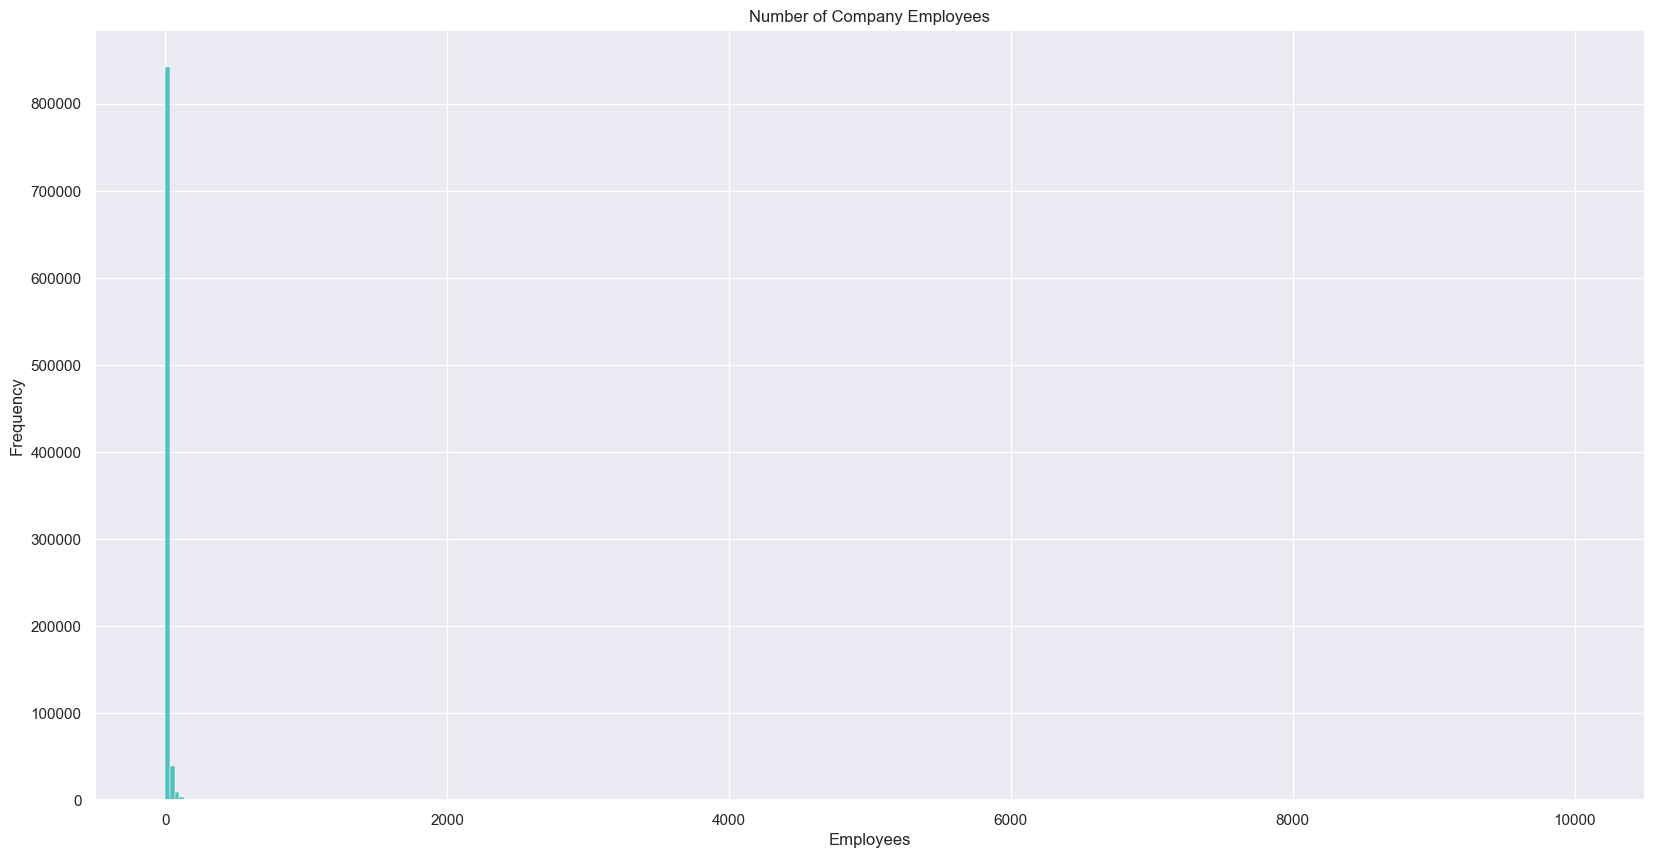

In [60]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.histplot(df["NoEmp"], color="lightseagreen", bins=300)

plt.title("Number of Company Employees")
plt.xlabel("Employees")
plt.ylabel("Frequency")
plt.show()

La variable NoEmp es discreta numerica, tiene 599 instancias diferentes y podria ser una feature importante en el modelo predictivo.

## NewExist
1 = Negocio existente, 2 = Nuevo negocio.

In [61]:
nvar = df["NewExist"].nunique()
nnan = df["NewExist"].isnull().sum()
pnan = round((nnan / df.shape[0]) * 100, 1)

print(f"Valores Distintos: {nvar}")
print(f"Numero de Nulos: {nnan}")
print(f"Porcentaje de Nulos: {pnan}%")

Valores Distintos: 3
Numero de Nulos: 136
Porcentaje de Nulos: 0.0%


In [62]:
df_new = df.groupby(["NewExist","MIS_Status"])["NewExist"].count()
df_new = df_new.unstack(level=1)
df_new = pd.DataFrame(df_new).rename_axis("Index", axis=1).reset_index()

df_new = df_new.rename(columns={"CHGOFF":"Default", "P I F":"Paid"})
df_new = df_new.replace(1.0, "Existing Business").replace(2.0, "New Business").replace(0.0, "Not Assigned")
df_new = df_new.fillna(0)
df_new["Count"] = df_new["Default"] + df_new["Paid"]
df_new["Frequency"] = round((df_new["Count"] / df_new["Count"].sum()) * 100, 1)
df_new.sort_values("Count", ascending=False)

Index,NewExist,Default,Paid,Count,Frequency
1,Existing Business,110114,533332,643446,71.7
2,New Business,47367,205192,252559,28.2
0,Not Assigned,63,965,1028,0.1


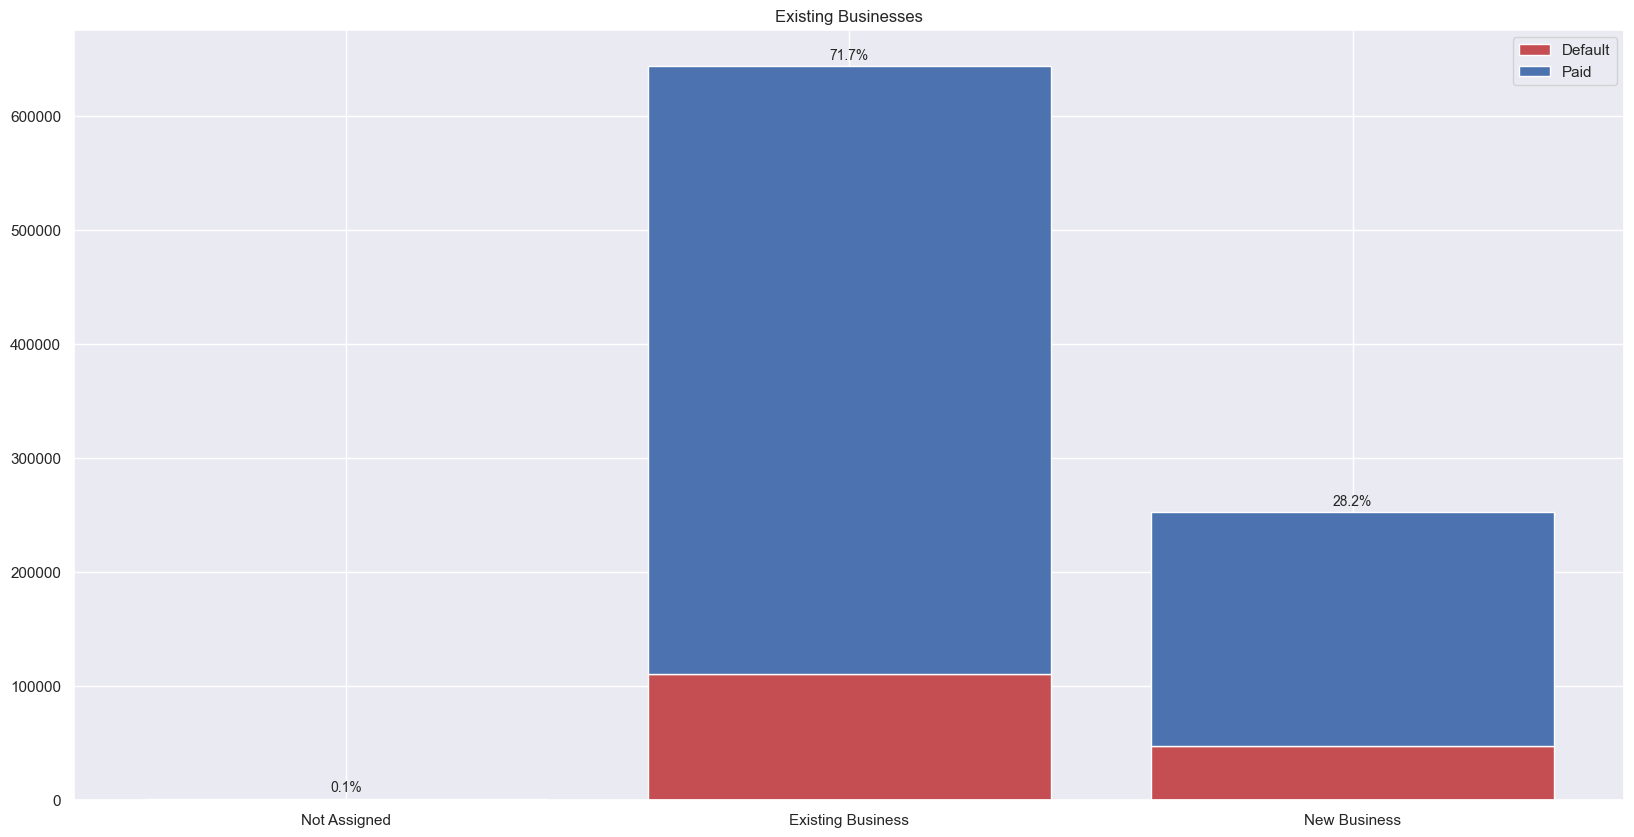

In [63]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")
plt.bar(df_new["NewExist"], df_new["Default"], label="Default", color="r")
plt.bar(df_new["NewExist"], df_new["Paid"], bottom=df_new["Default"], label="Paid", color="b")

for num in range(len(df_new)):
    plt.annotate(str(df_new["Frequency"][num])+"%",
                 xy=(num, df_new["Count"][num]),
                 xytext=(0, 5), textcoords="offset points", ha="center", size=10)

plt.title("Existing Businesses")
plt.legend()
plt.show()

La variable NewExist es dicreta, cuenta con 3 categorias diferentes y podria ser una feature importante en el modelo predictivo.

## CreateJob
Número de trabajos creados.



In [64]:
nnan = df["CreateJob"].isnull().sum()
nvar = df["CreateJob"].nunique()
pvar = round((nvar / df.shape[0]) * 100, 1)

print(f"Numero de Nulos: {nnan}")
print(f"Valores Distintos: {nvar}")
print(f"Porcentaje Distintos: {pvar}%")

Numero de Nulos: 0
Valores Distintos: 246
Porcentaje Distintos: 0.0%


In [65]:
df_job = df.groupby(["CreateJob","MIS_Status"])["CreateJob"].count()
df_job = df_job.unstack(level=1)
df_job = pd.DataFrame(df_job).rename_axis("Index", axis=1).reset_index()

df_job = df_job.rename(columns={"CHGOFF":"Default", "P I F":"Paid"})
df_job = df_job.fillna(0)
df_job["Count"] = df_job["Default"] + df_job["Paid"]
df_job["Frequency"] = round((df_job["Count"] / df_job["Count"].sum()) * 100, 1)
df_job.sort_values("Count", ascending=False).head()

Index,CreateJob,Default,Paid,Count,Frequency
0,0,98592.0,529022.0,627614.0,70.0
1,1,18889.0,44116.0,63005.0,7.0
2,2,15476.0,42277.0,57753.0,6.4
3,3,6701.0,22075.0,28776.0,3.2
4,4,4201.0,16292.0,20493.0,2.3


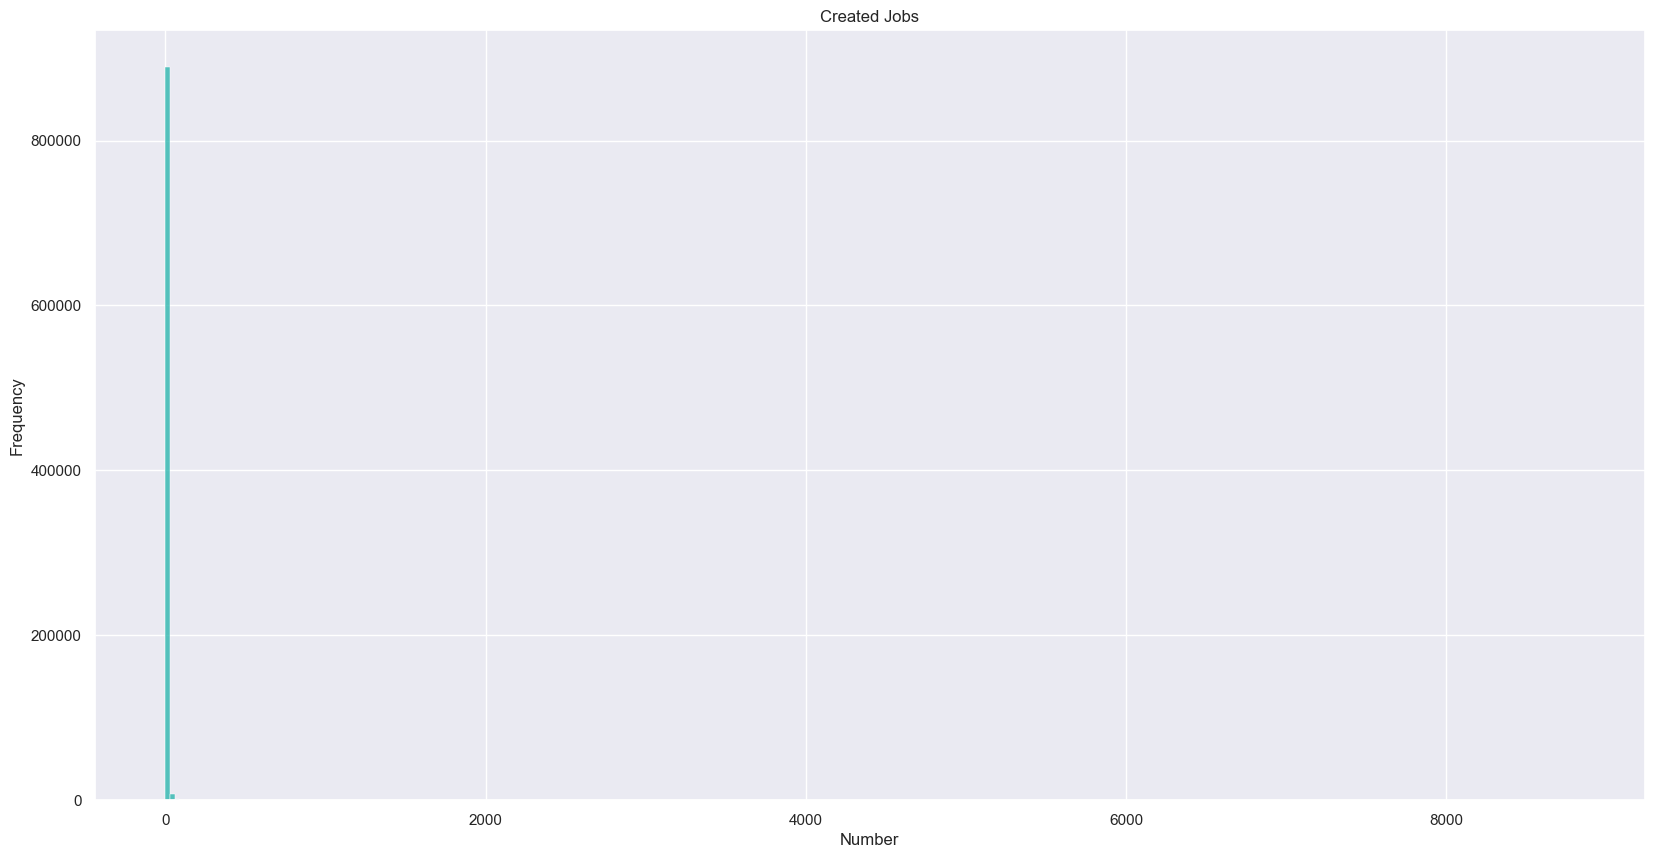

In [66]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.histplot(df["CreateJob"], color="lightseagreen", bins=300)

plt.title("Created Jobs")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

La variable CreateJob es discreta, tiene 246 instancias diferentes y podria ser una feature importante en el modelo predictivo.

## RetainedJob
Número de trabajos retenidos.

In [67]:
nnan = df["RetainedJob"].isnull().sum()
nvar = df["RetainedJob"].nunique()
pvar = round((nvar / df.shape[0]) * 100, 1)

print(f"Numero de Nulos: {nnan}")
print(f"Valores Distintos: {nvar}")
print(f"Porcentaje Distintos: {pvar}%")

Numero de Nulos: 0
Valores Distintos: 358
Porcentaje Distintos: 0.0%


In [68]:
df_rjob = df.groupby(["RetainedJob","MIS_Status"])["RetainedJob"].count()
df_rjob = df_rjob.unstack(level=1)
df_rjob = pd.DataFrame(df_rjob).rename_axis("Index", axis=1).reset_index()

df_rjob = df_rjob.rename(columns={"CHGOFF":"Default", "P I F":"Paid"})
df_rjob = df_rjob.fillna(0)
df_rjob["Count"] = df_rjob["Default"] + df_rjob["Paid"]
df_rjob["Frequency"] = round((df_rjob["Count"] / df_rjob["Count"].sum()) * 100, 1)
df_rjob.sort_values("Count", ascending=False).head()

Index,RetainedJob,Default,Paid,Count,Frequency
0,0,42310.0,397663.0,439973.0,49.0
1,1,26471.0,61793.0,88264.0,9.8
2,2,21200.0,55354.0,76554.0,8.5
3,3,14314.0,35482.0,49796.0,5.6
4,4,11155.0,28396.0,39551.0,4.4


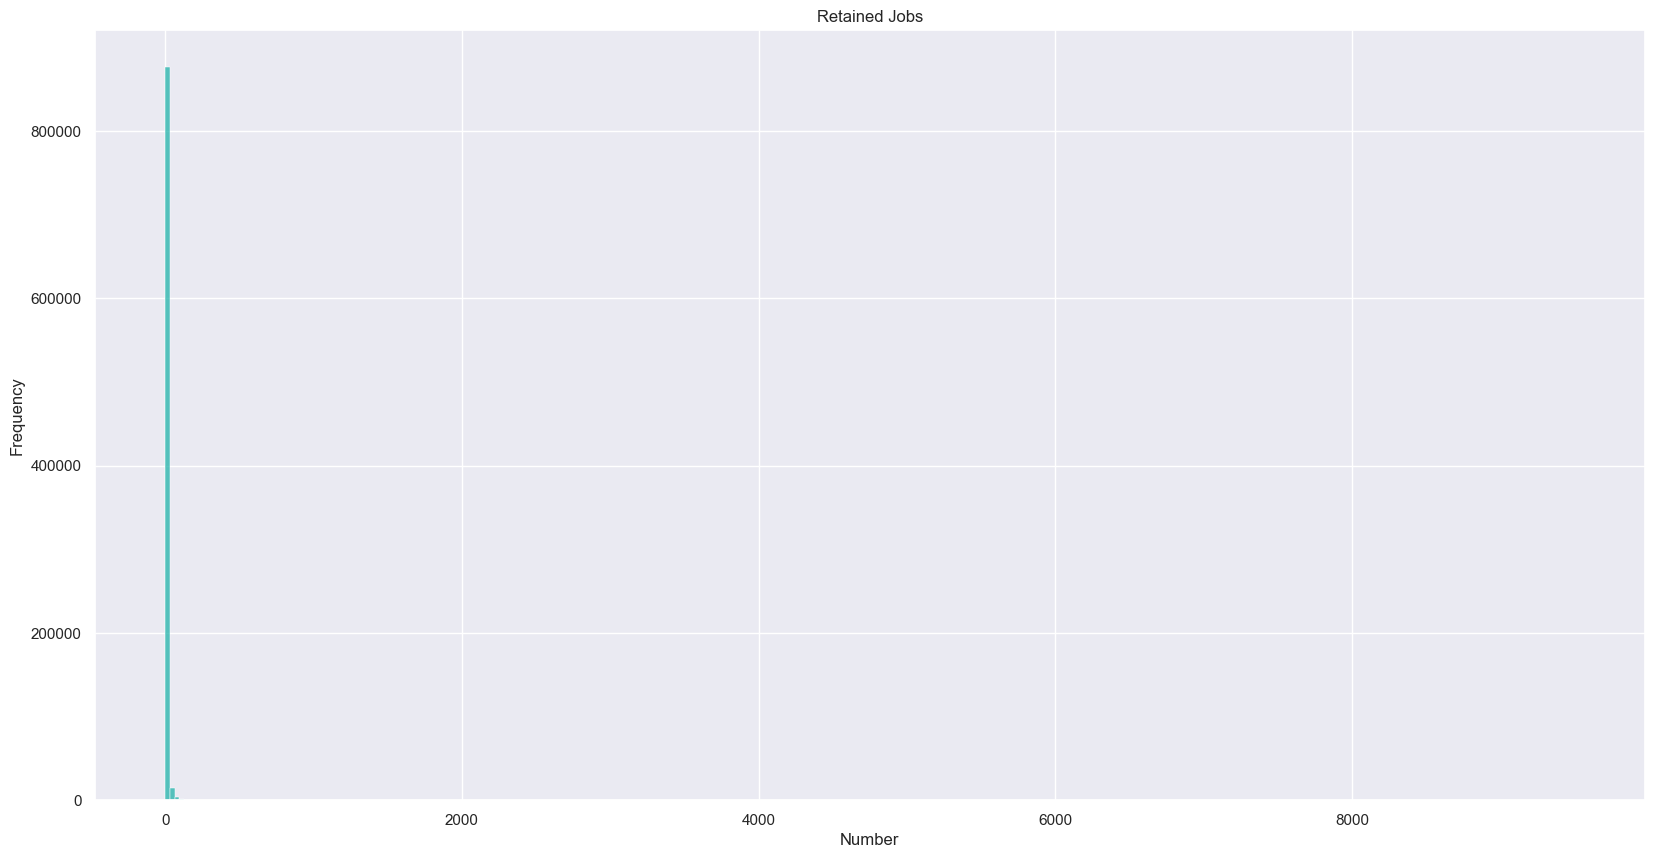

In [69]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.histplot(df["RetainedJob"], color="lightseagreen", bins=300)

plt.title("Retained Jobs")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

La variable RetainedJob es discreta, tiene 358 instancias diferentes y podria ser una feature importante en el modelo predictivo.

## FranchiseCode
Código de franquicia: (00000 o 00001) = Sin franquicia.

In [70]:
nnan = df["FranchiseCode"].isnull().sum()
nvar = df["FranchiseCode"].nunique()
pvar = round((nvar / df.shape[0]) * 100, 1)

print(f"Numero de Nulos: {nnan}")
print(f"Valores Distintos: {nvar}")
print(f"Porcentaje Distintos: {pvar}%")

Numero de Nulos: 0
Valores Distintos: 2768
Porcentaje Distintos: 0.3%


In [71]:
df_fc = df.groupby("FranchiseCode")["FranchiseCode"].count()
df_fc = df_fc.rename("Count").reset_index()
df_fc = pd.DataFrame(df_fc)

df_fc["Frequency"] = round((df_fc["Count"] / df.shape[0]) * 100, 1)
df_fc.sort_values("Count", ascending=False).head()

,FranchiseCode,Count,Frequency
1,1,638554,71.0
0,0,208835,23.2
2376,78760,3373,0.4
2038,68020,1921,0.2
1489,50564,1034,0.1


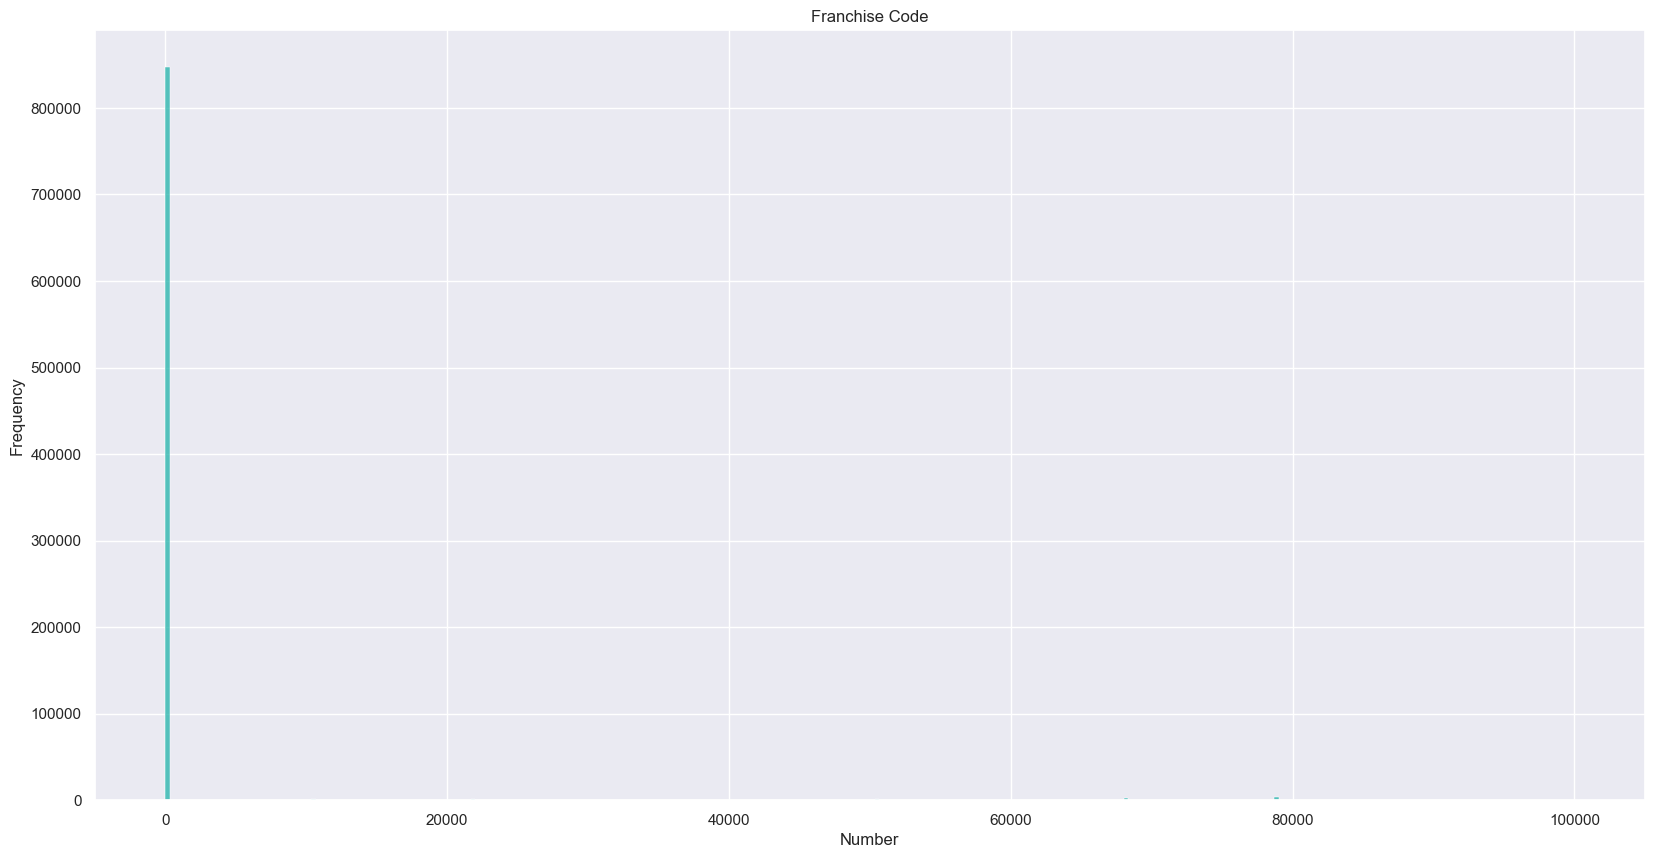

In [72]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.histplot(df["FranchiseCode"], color="lightseagreen", bins=300)

plt.title("Franchise Code")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

La variable FranchiseCode tiene 94.2% de codigos sin franquicia (codigos 0 o 1), y no aportaria al modelo predictivo.

## UrbanRural
1 = Urbano, 2 = Rural, 0 = Indefinidos.

In [73]:
nvar = df["UrbanRural"].nunique()
nnan = df["UrbanRural"].isnull().sum()
pnan = round((nnan / df.shape[0]) * 100, 1)

print(f"Valores Distintos: {nvar}")
print(f"Numero de Nulos: {nnan}")
print(f"Porcentaje de Nulos: {pnan}%")

Valores Distintos: 3
Numero de Nulos: 0
Porcentaje de Nulos: 0.0%


In [74]:
df_ur = df.groupby(["UrbanRural","MIS_Status"])["UrbanRural"].count()
df_ur = df_ur.unstack(level=1)
df_ur = pd.DataFrame(df_ur).rename_axis("Index", axis=1).reset_index()

df_ur = df_ur.rename(columns={"CHGOFF":"Default", "P I F":"Paid"})
df_ur = df_ur.replace(1, "Urban").replace(2, "Rural").replace(0, "Undefined")
df_ur = df_ur.fillna(0)
df_ur["Count"] = df_ur["Default"] + df_ur["Paid"]
df_ur["Frequency"] = round((df_ur["Count"] / df_ur["Count"].sum()) * 100, 1)
df_ur.sort_values("Count", ascending=False)

Index,UrbanRural,Default,Paid,Count,Frequency
1,Urban,114867,354414,469281,52.3
0,Undefined,22978,299848,322826,36.0
2,Rural,19713,85347,105060,11.7


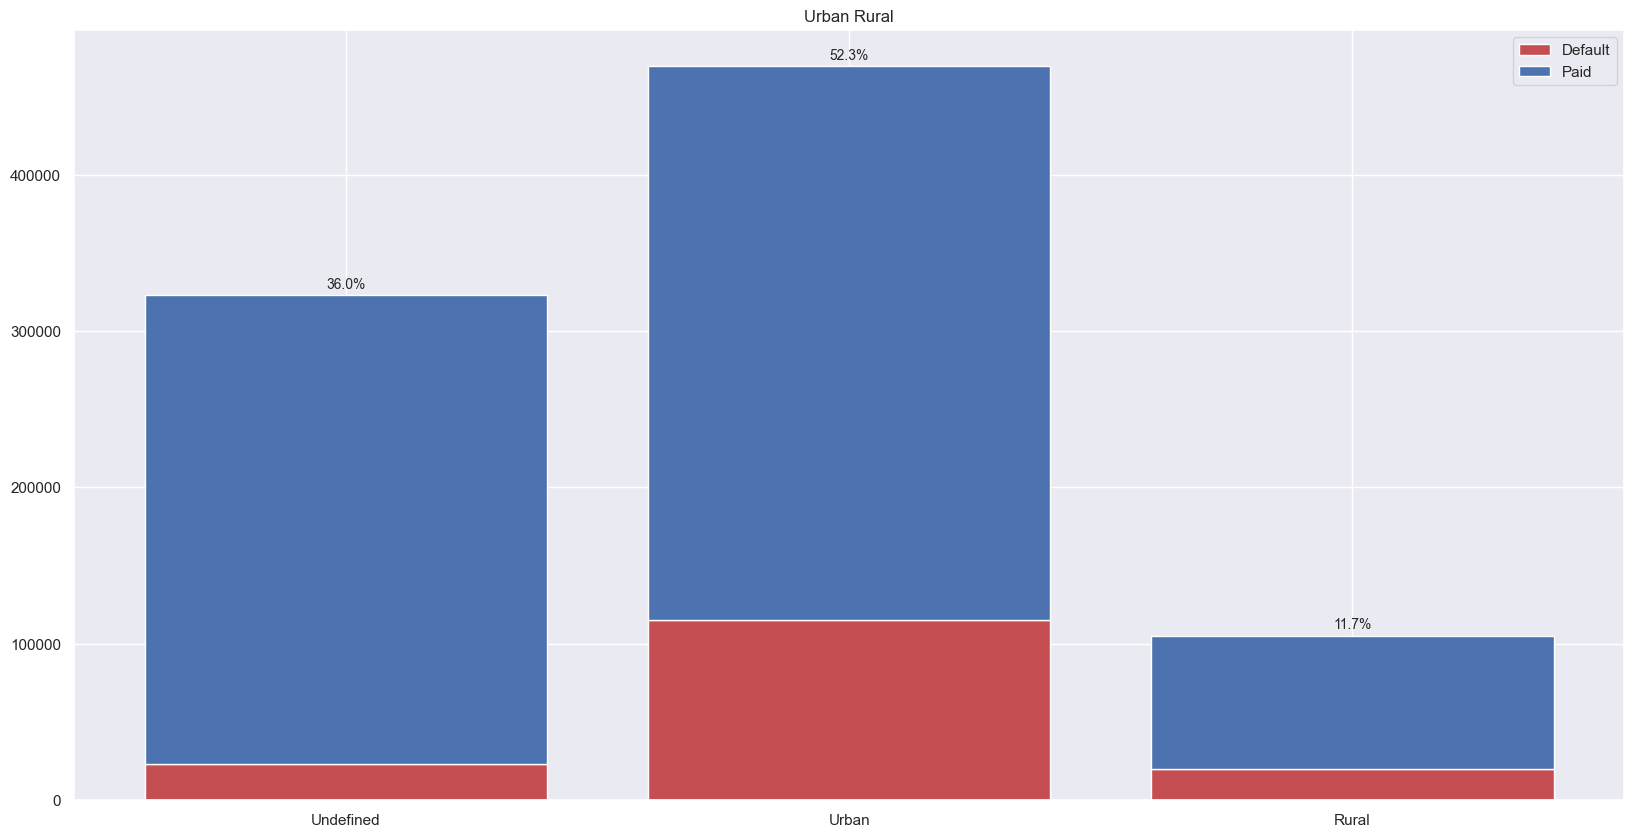

In [75]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")
plt.bar(df_ur["UrbanRural"], df_ur["Default"], label="Default", color="r")
plt.bar(df_ur["UrbanRural"], df_ur["Paid"], bottom=df_ur["Default"], label="Paid", color="b")

for num in range(len(df_ur)):
    plt.annotate(str(df_ur["Frequency"][num])+"%",
                 xy=(num, df_ur["Count"][num]),
                 xytext=(0, 5), textcoords="offset points", ha="center", size=10)

plt.title("Urban Rural")
plt.legend()
plt.show()

La variable UrbanRural es dicreta, cuenta con 3 categorias diferentes y podria ser una feature importante en el modelo predictivo.

## RevLineCr
Línea de crédito renovable: Y = Si, N = No.

In [76]:
nvar = df["RevLineCr"].nunique()
nnan = df["RevLineCr"].isnull().sum()
pnan = round((nnan / df.shape[0]) * 100, 1)

print(f"Valores Distintos: {nvar}")
print(f"Numero de Nulos: {nnan}")
print(f"Porcentaje de Nulos: {pnan}%")

Valores Distintos: 18
Numero de Nulos: 4528
Porcentaje de Nulos: 0.5%


In [77]:
df_line = df.groupby("RevLineCr")["RevLineCr"].count()
df_line = df_line.rename("Count").reset_index()
df_line = pd.DataFrame(df_line)

df_line["Frequency"] = round((df_line["Count"] / df.shape[0]) * 100, 1)
df_line.sort_values("Count", ascending=False).head()

,RevLineCr,Count,Frequency
12,N,420288,46.7
3,0,257602,28.6
16,Y,201397,22.4
15,T,15284,1.7
4,1,23,0.0


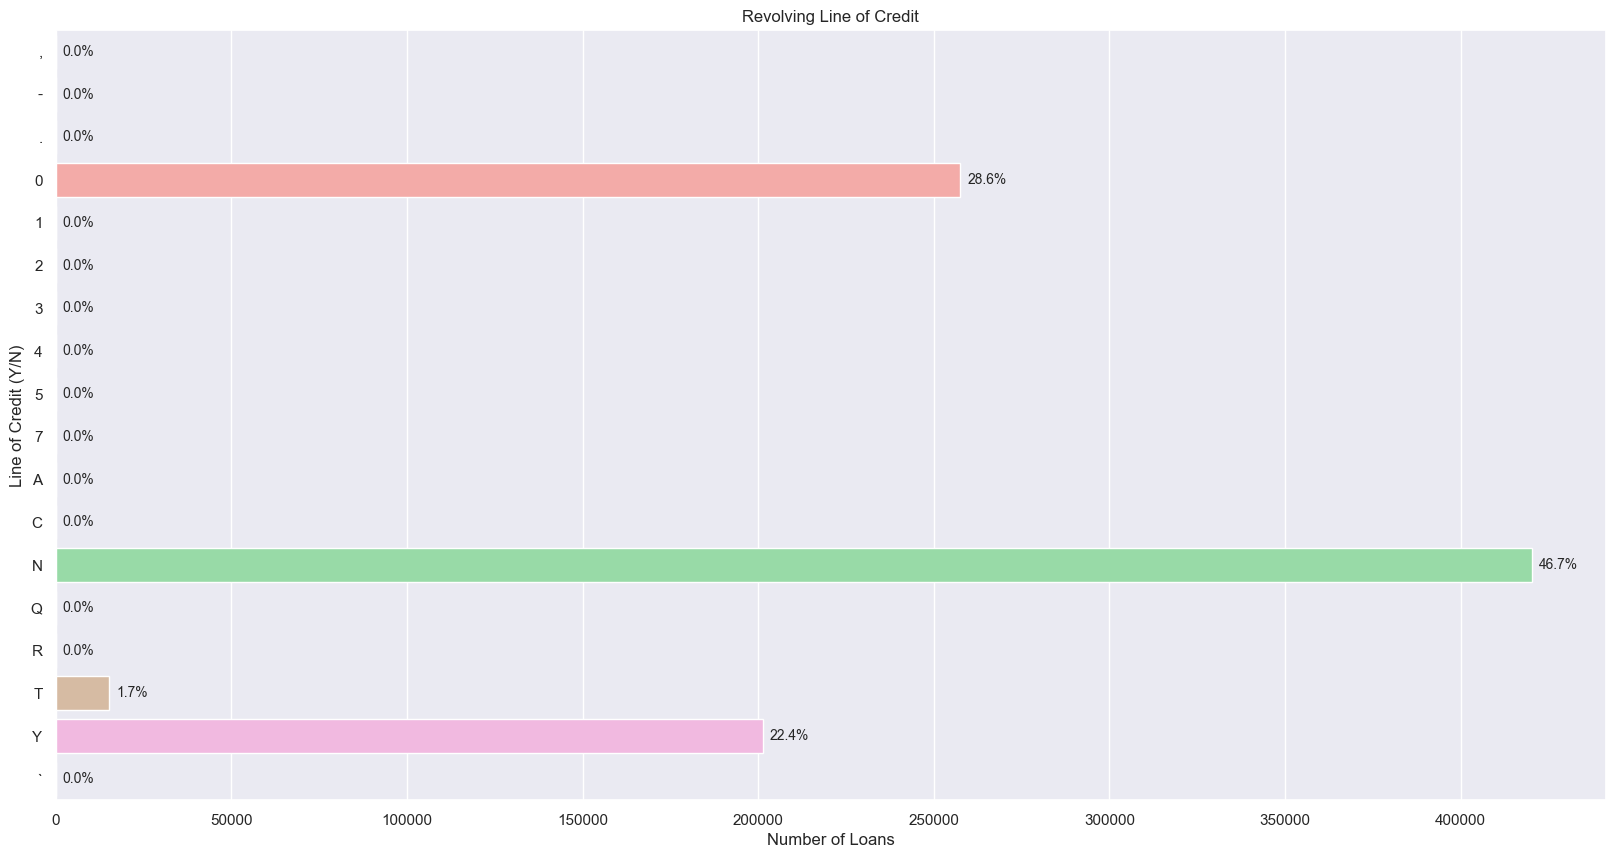

In [78]:
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
sns.barplot(data=df_line, x="Count", y="RevLineCr", palette="pastel")

for num in range(len(df_line)):
    plt.annotate(str(df_line["Frequency"][num])+"%",
                 xy=(df_line["Count"][num], num),
                 xytext=(5, 0), textcoords="offset points", va="center", size=10)

plt.title("Revolving Line of Credit")
plt.xlabel("Number of Loans")
plt.ylabel("Line of Credit (Y/N)")
plt.show()

La variable RevLineCr es dicreta, 69.1% de los datos estan definidos, pero podria ser una feature importante en el modelo predictivo.

## LowDoc
Programa de préstamos: Y = Si, N = No.

In [79]:
nvar = df["LowDoc"].nunique()
nnan = df["LowDoc"].isnull().sum()
pnan = round((nnan / df.shape[0]) * 100, 1)

print(f"Valores Distintos: {nvar}")
print(f"Numero de Nulos: {nnan}")
print(f"Porcentaje de Nulos: {pnan}%")

Valores Distintos: 8
Numero de Nulos: 2582
Porcentaje de Nulos: 0.3%


In [80]:
df_low = df.groupby("LowDoc")["LowDoc"].count()
df_low = df_low.rename("Count").reset_index()
df_low = pd.DataFrame(df_low)

df_low["Frequency"] = round((df_low["Count"] / df.shape[0]) * 100, 1)
df_low.sort_values("Count", ascending=False).head()

,LowDoc,Count,Frequency
4,N,782822,87.1
7,Y,110335,12.3
0,0,1491,0.2
3,C,758,0.1
6,S,603,0.1


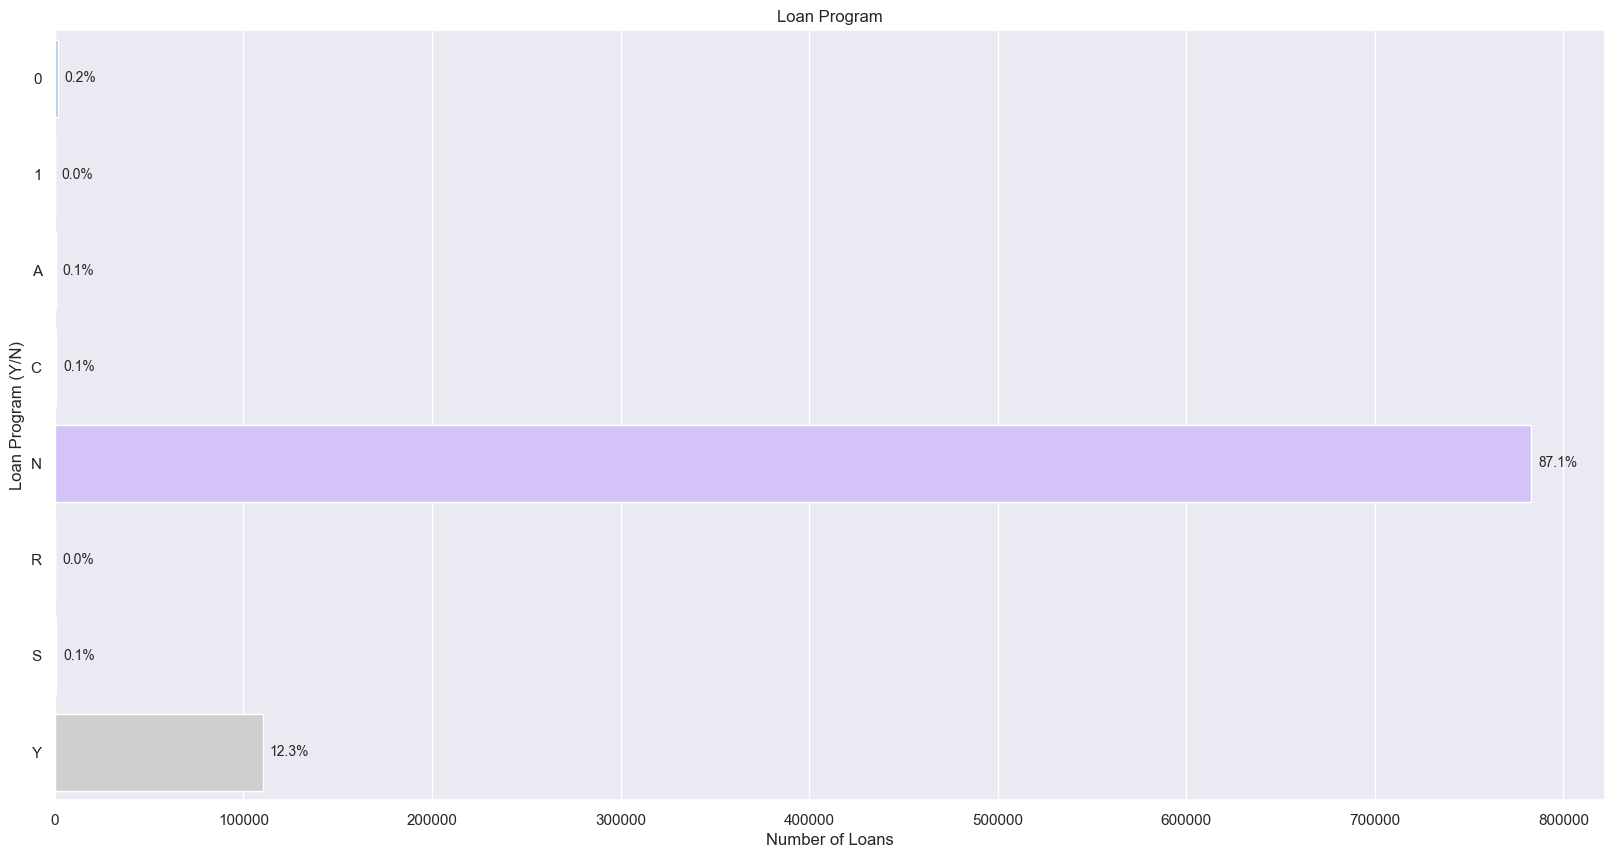

In [81]:
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
sns.barplot(data=df_low, x="Count", y="LowDoc", palette="pastel")

for num in range(len(df_low)):
    plt.annotate(str(df_low["Frequency"][num])+"%",
                 xy=(df_low["Count"][num], num),
                 xytext=(5, 0), textcoords="offset points", va="center", size=10)

plt.title("Loan Program")
plt.xlabel("Number of Loans")
plt.ylabel("Loan Program (Y/N)")
plt.show()

La variable LowDoc es dicreta, tiene 2 categorias definidas (99.4%), y podria ser una feature importante en el modelo predictivo.

## ChgOffDate
La fecha en que un préstamo se declara en mora.

In [5]:
nvar = df["ChgOffDate"].nunique()
nnan = df["ChgOffDate"].isnull().sum()
pnan = round((nnan / df.shape[0]) * 100, 1)

print(f"Valores Distintos: {nvar}")
print(f"Numero de Nulos: {nnan}")
print(f"Porcentaje de Nulos: {pnan}%")

Valores Distintos: 6448
Numero de Nulos: 736465
Porcentaje de Nulos: 81.9%


La variable ChgOffDate indica cuando un prestamo fue declarado en mora, por lo tanto podria tratarse de un "target leakage problem" (fuga de informacion de la variable objetivo) debido a que la variable contiene información posterior a la ocurrencia del evento que se desea predecir (MIS_Status), vale decir que, si esta variable es nula el prestamo no estaria en default y viceversa.  

In [51]:
df_cod = df[["ChgOffDate","MIS_Status"]].copy()
df_cod.rename(columns={"MIS_Status":"Default"}, inplace=True)
df_cod["Default"] = np.where(df_cod["Default"]=="P I F", 0, 1)

df_cod["ChgOff"] = np.where(df_cod["ChgOffDate"].isnull(), "Null", "Not Null")
df_cod = df_cod.groupby(["ChgOff","Default"])["Default"].count()
df_cod = df_cod.rename("Count").reset_index()

df_cod["Frequency"] = round((df_cod["Count"] / df_cod.groupby("ChgOff")["Count"].transform("sum")) * 100, 2)
df_cod

,ChgOff,Default,Count,Frequency
0,Not Null,0,4927,3.03
1,Not Null,1,157772,96.97
2,Null,0,734682,99.76
3,Null,1,1783,0.24


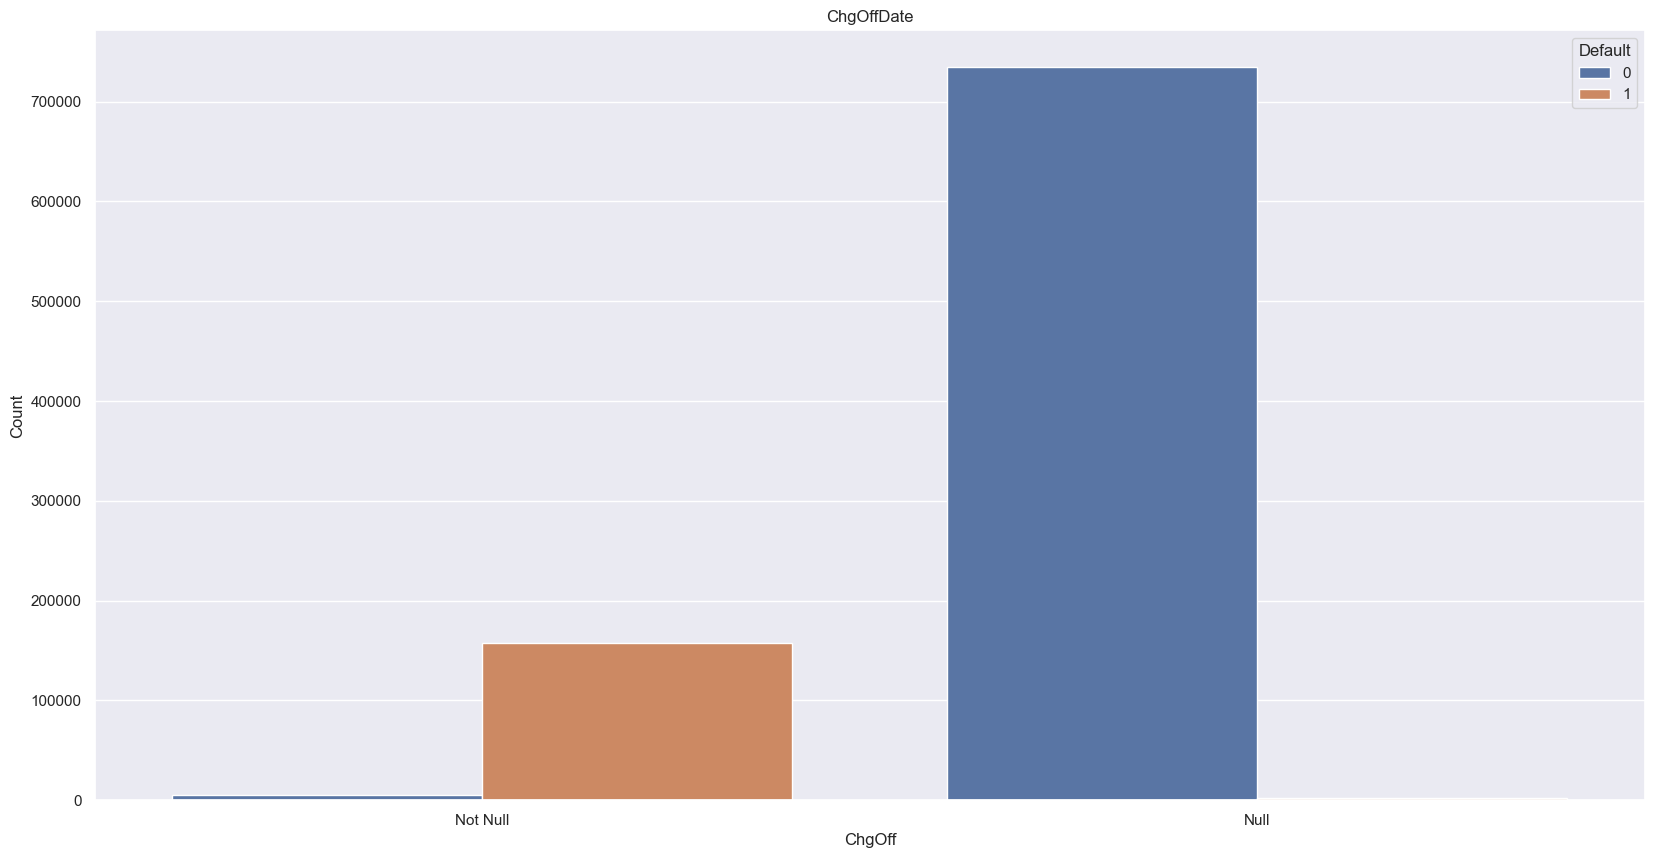

In [60]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")
sns.barplot(data=df_cod, x="ChgOff", y="Count", hue="Default")

plt.title("ChgOffDate")
plt.show()

La variable ChgOffDate tiene el problema de fuga de informacion de la variable objetivo, y no aportaria al modelo predictivo.

## DisbursementDate
Fecha de desembolso.

In [88]:
nvar = df["DisbursementDate"].nunique()
nnan = df["DisbursementDate"].isnull().sum()
pnan = round((nnan / df.shape[0]) * 100, 1)

print(f"Valores Distintos: {nvar}")
print(f"Numero de Nulos: {nnan}")
print(f"Porcentaje de Nulos: {pnan}%")

Valores Distintos: 8472
Numero de Nulos: 2368
Porcentaje de Nulos: 0.3%


In [89]:
def calculate_date(app_date):
    date = app_date.split("-")
    year = date[2]
    if year == "00":
        year = "20" + year
    elif int(year) > 14:
        year = "19" + year
    else:
        year = "20" + year
    return f"{date[0]}-{date[1]}-{year}"

In [90]:
df_dd = df[["DisbursementDate"]].copy()
df_dd = df_dd.dropna()
df_dd["AppYear"] = pd.to_datetime(df_dd["DisbursementDate"].apply(calculate_date)).dt.year
df_dd = df_dd.groupby("AppYear")["AppYear"].count()
df_dd = df_dd.rename("CountDD").reset_index()

df_dd = df_dd.merge(df_apdt, on="AppYear", how="inner")
df_dd = df_dd.rename(columns={"AppYear":"Year", "CountDD":"DisbursementYear", "Count":"ApprovalYear"})
df_dd = df_dd.loc[:,["Year","DisbursementYear","ApprovalYear"]]
df_dd.sort_values("DisbursementYear", ascending=False).head()

,Year,DisbursementYear,ApprovalYear
39,2006,79309,77247
38,2005,74771,75115
37,2004,70208,71281
40,2007,68945,67016
36,2003,59058,62247


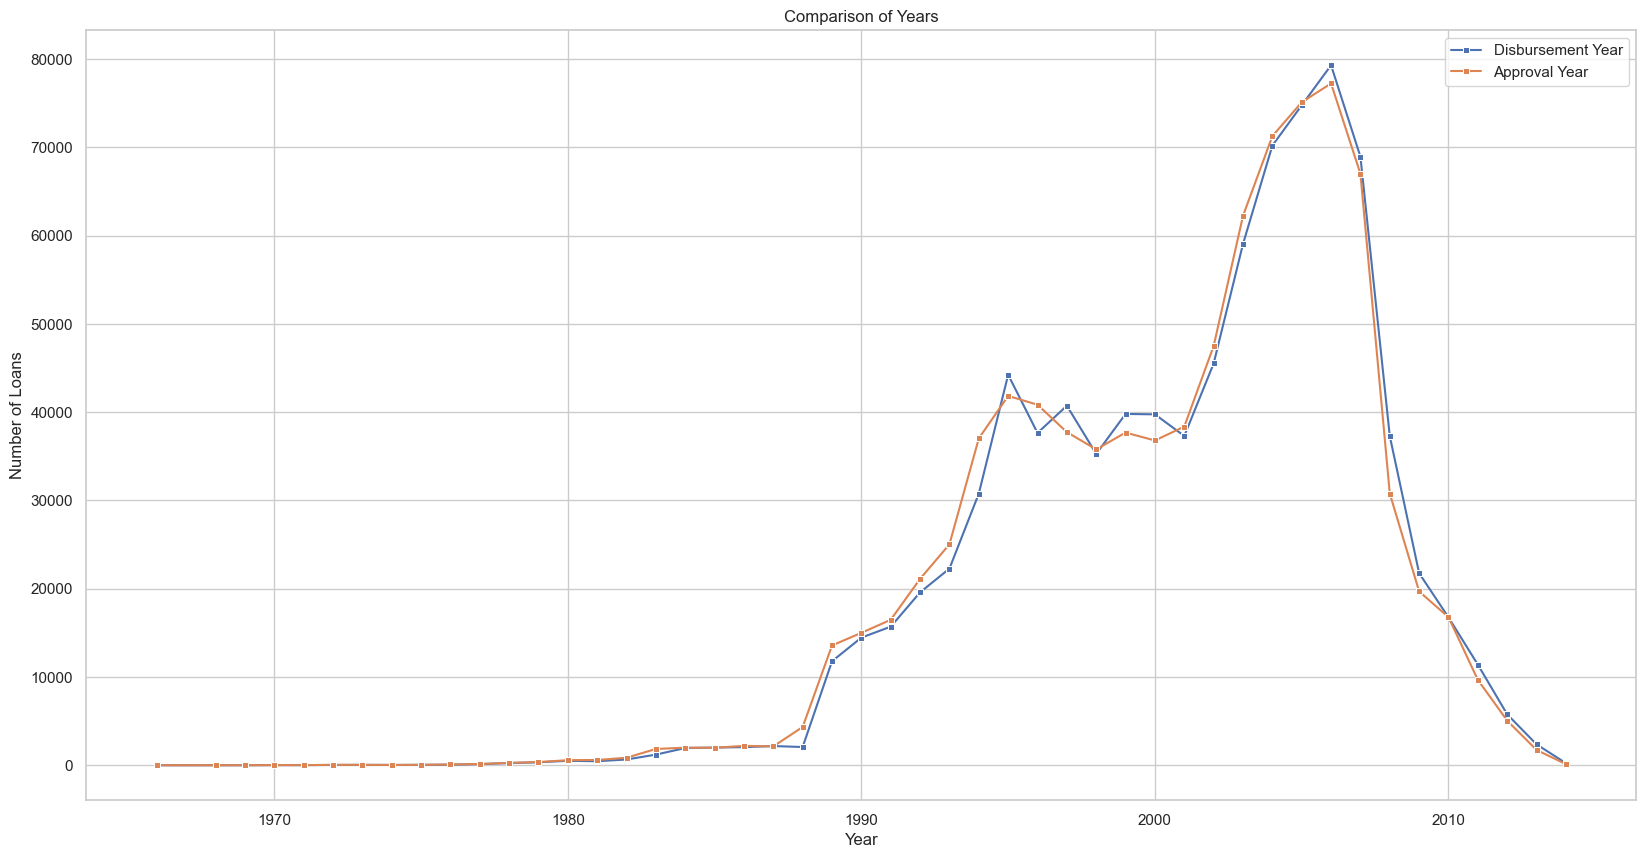

In [91]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.lineplot(data=df_dd, x="Year", y="DisbursementYear", label="Disbursement Year", linewidth=1.5, linestyle="-", marker="s", markersize=4)
sns.lineplot(data=df_dd, x="Year", y="ApprovalYear", label="Approval Year", linewidth=1.5, linestyle="-", marker="s", markersize=4)

plt.title("Comparison of Years")
plt.xlabel("Year")
plt.ylabel("Number of Loans")
plt.legend()
plt.show()

La variable DisbursementDate es de tipo fecha, aunque tiene 2368 nulos, podria ser una feature importante en el modelo predictivo.

## DisbursementGross
Monto Bruto desembolsado.

In [73]:
nvar = df["DisbursementGross"].nunique()
nnan = df["DisbursementGross"].isnull().sum()
pnan = round((nnan / df.shape[0]) * 100, 1)

print(f"Valores Distintos: {nvar}")
print(f"Numero de Nulos: {nnan}")
print(f"Porcentaje de Nulos: {pnan}%")

Valores Distintos: 118859
Numero de Nulos: 0
Porcentaje de Nulos: 0.0%


In [74]:
df_dg = df[["DisbursementGross"]].copy()
df_dg["DisbursementGross"] = df_dg["DisbursementGross"].str.replace(r'[\$,]', '', regex=True).astype(float)
df_dg.sample(3)

,DisbursementGross
3627,35000.0
893499,57000.0
647886,30000.0


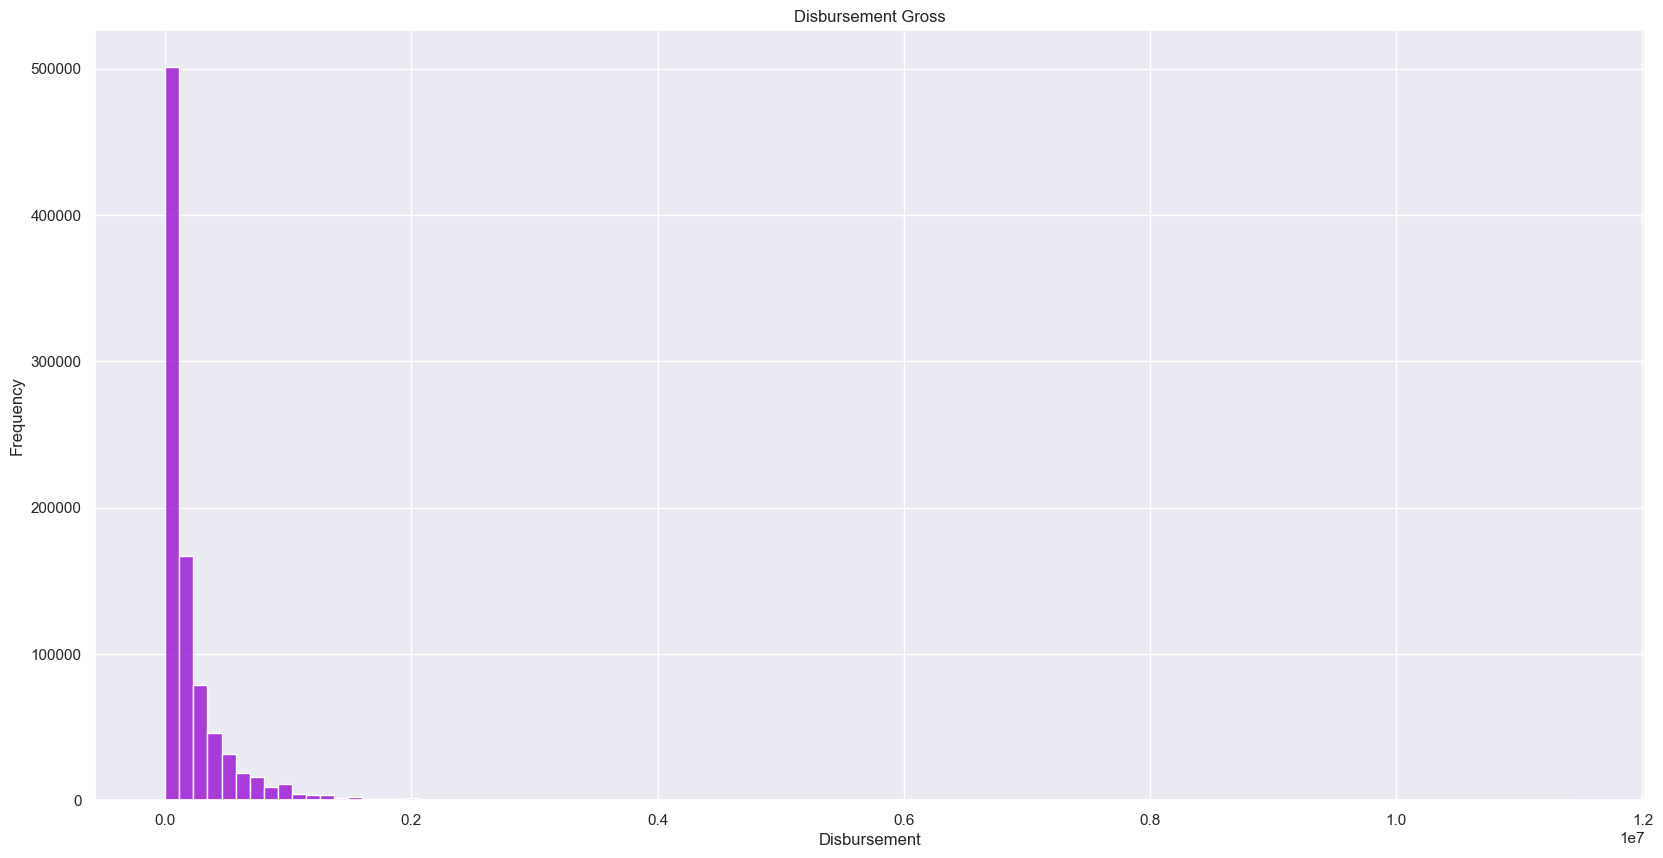

In [75]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.histplot(df_dg["DisbursementGross"], color="darkviolet", bins=100)

plt.title("Disbursement Gross")
plt.xlabel("Disbursement")
plt.ylabel("Frequency")
plt.show()

La variable DisbursementGross es continua y podria ser una feature importante en el modelo predictivo.

## BalanceGross
Saldo Bruto pendiente.

In [17]:
nvar = df["BalanceGross"].nunique()
nnan = df["BalanceGross"].isnull().sum()
pnan = round((nnan / df.shape[0]) * 100, 1)

print(f"Valores Distintos: {nvar}")
print(f"Numero de Nulos: {nnan}")
print(f"Porcentaje de Nulos: {pnan}%")

Valores Distintos: 15
Numero de Nulos: 0
Porcentaje de Nulos: 0.0%


In [18]:
df_bg = df[["BalanceGross"]].copy()
df_bg["BalanceGross"] = df_bg["BalanceGross"].str.replace(r'[\$,]', '', regex=True).astype(float)

df_bg = df_bg.groupby("BalanceGross")["BalanceGross"].count()
df_bg = df_bg.rename("Count").reset_index()
df_bg = pd.DataFrame(df_bg)

df_bg["Frequency"] = round((df_bg["Count"] / df.shape[0]) * 100, 1)
df_bg.sort_values("Count", ascending=False).head()

,BalanceGross,Count,Frequency
0,0.0,899150,100.0
1,600.0,1,0.0
2,1760.0,1,0.0
3,9111.0,1,0.0
4,12750.0,1,0.0


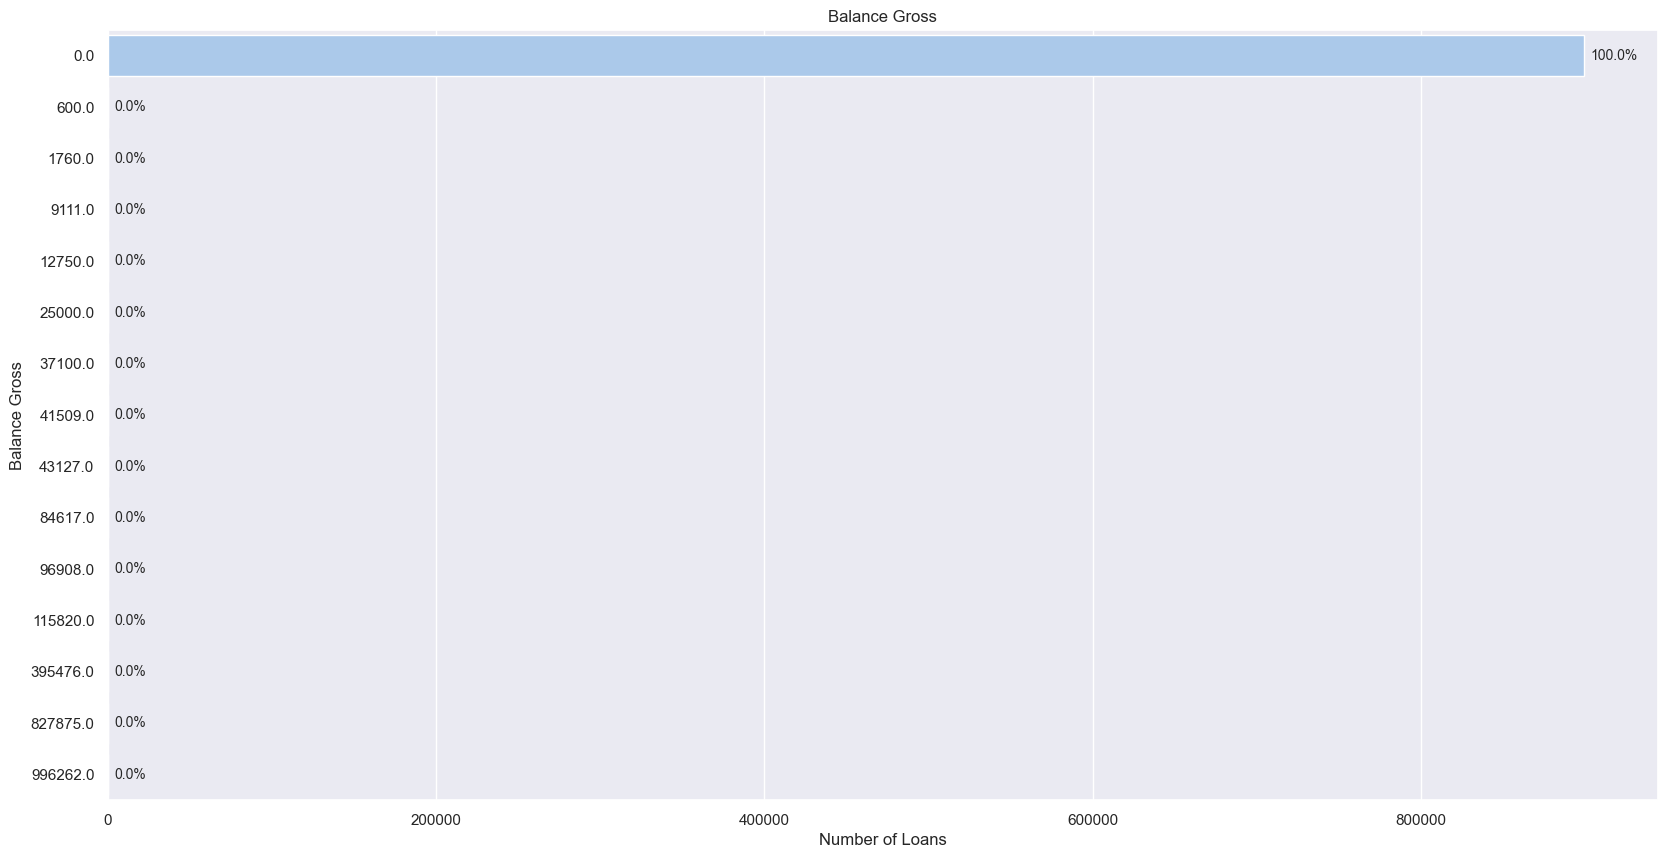

In [19]:
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
df_bg["BalanceGross"] = df_bg["BalanceGross"].astype(str)
sns.barplot(data=df_bg, x="Count", y="BalanceGross", palette="pastel")

for num in range(len(df_bg)):
    plt.annotate(str(df_bg["Frequency"][num])+"%",
                 xy=(df_bg["Count"][num], num),
                 xytext=(5, 0), textcoords="offset points", va="center", size=10)

plt.title("Balance Gross")
plt.xlabel("Number of Loans")
plt.ylabel("Balance Gross")
plt.show()

La variable BalanceGross es continua, tiene practicamente 100% de montos en 0.0, y no aportaria al modelo predictivo.

## ChgOffPrinGr
Importe cancelado.

In [92]:
nvar = df["ChgOffPrinGr"].nunique()
nnan = df["ChgOffPrinGr"].isnull().sum()
pnan = round((nnan / df.shape[0]) * 100, 1)

print(f"Valores Distintos: {nvar}")
print(f"Numero de Nulos: {nnan}")
print(f"Porcentaje de Nulos: {pnan}%")

Valores Distintos: 83165
Numero de Nulos: 0
Porcentaje de Nulos: 0.0%


La variable ChgOffPrinGr indica el monto de la mora, lo cual se determina despues de que sabemos que el préstamo está en mora o no, por lo tanto seria un "target leakage problem" (fuga de informacion de la variable objetivo), porque el préstamo no está en mora si la cantidad castigada es cero, y viceversa, podemos saber que el préstamo está en mora si el monto de la cancelación no es cero.

In [97]:
df_cop = df[["ChgOffPrinGr","MIS_Status"]].copy()
df_cop.rename(columns={"MIS_Status":"Default"}, inplace=True)
df_cop["ChgOffPrinGr"] = df_cop["ChgOffPrinGr"].str.replace(r"[\$,]", "", regex=True).astype(float)
df_cop["Default"] = np.where(df_cop["Default"]=="P I F", 0, 1)

df_cop["ChgOff"] = np.where(df_cop["ChgOffPrinGr"]==0, "N", "Y")
df_cop = df_cop.groupby(["ChgOff","Default"])["Default"].count()
df_cop = df_cop.rename("Count").reset_index()

df_cop["Frequency"] = round((df_cop["Count"] / df_cop.groupby("ChgOff")["Count"].transform("sum")) * 100, 2)
df_cop

,ChgOff,Default,Count,Frequency
0,N,0,734725,99.67
1,N,1,2427,0.33
2,Y,0,4884,3.01
3,Y,1,157128,96.99


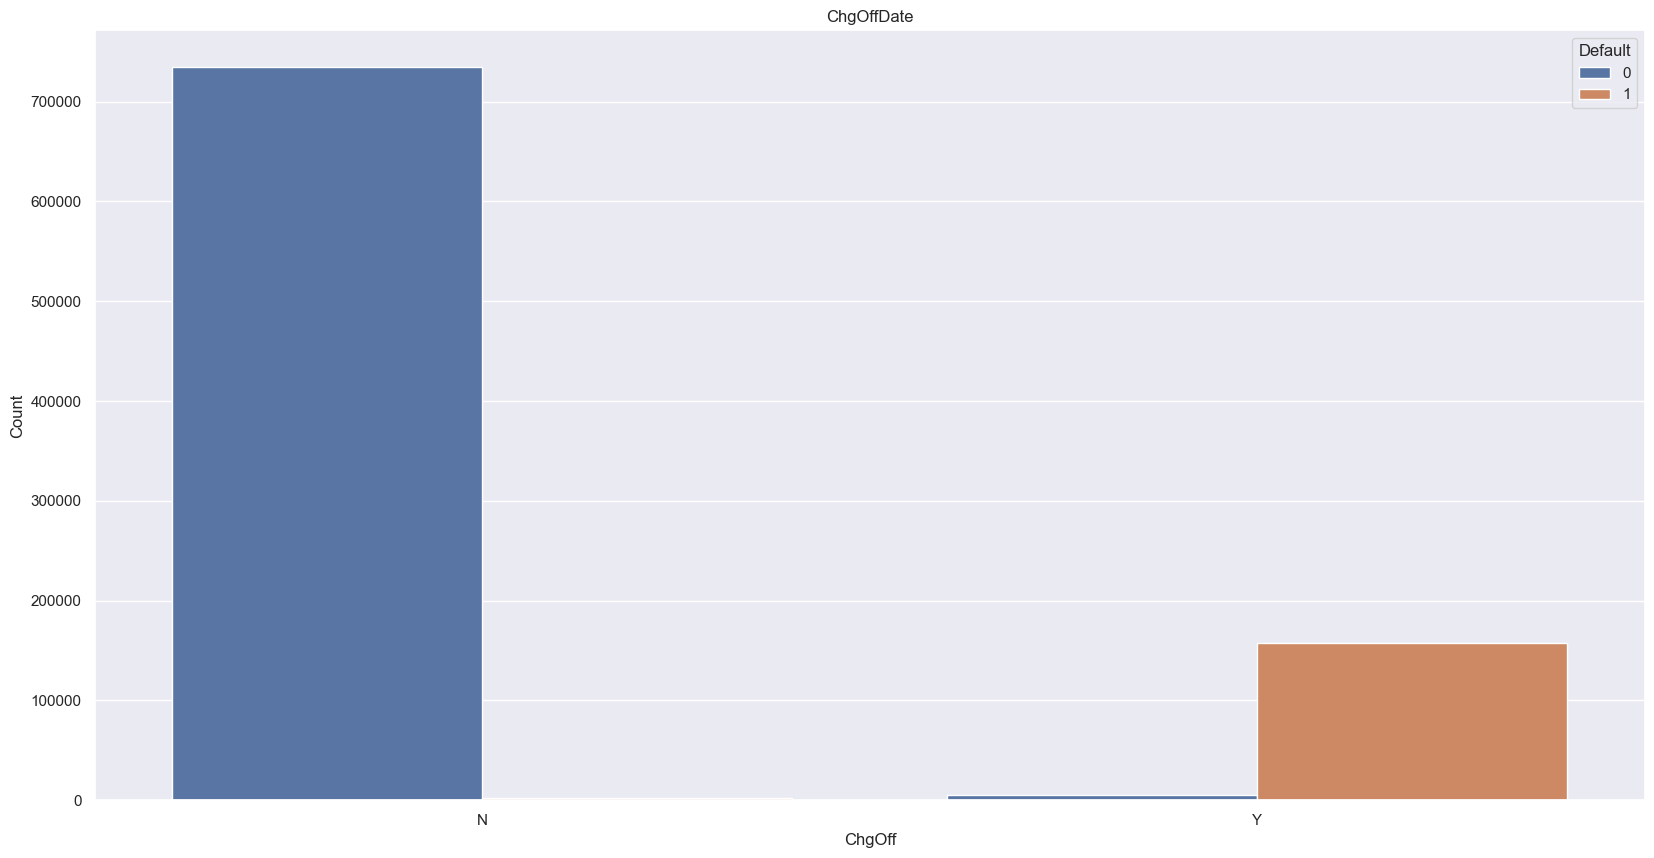

In [98]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")
sns.barplot(data=df_cop, x="ChgOff", y="Count", hue="Default")

plt.title("ChgOffDate")
plt.show()

La variable ChgOffPrinGr tiene el problema de fuga de informacion de la variable objetivo, y no aportaria al modelo predictivo.

## GrAppv
Importe bruto del préstamo aprobado por el banco.

In [82]:
nvar = df["GrAppv"].nunique()
nnan = df["GrAppv"].isnull().sum()
pnan = round((nnan / df.shape[0]) * 100, 1)

print(f"Valores Distintos: {nvar}")
print(f"Numero de Nulos: {nnan}")
print(f"Porcentaje de Nulos: {pnan}%")

Valores Distintos: 22128
Numero de Nulos: 0
Porcentaje de Nulos: 0.0%


In [83]:
df_ga = df[["GrAppv"]].copy()
df_ga["GrAppv"] = df_ga["GrAppv"].str.replace(r'[\$,]', '', regex=True).astype(float)
df_ga.sample(3)

,GrAppv
320440,20000.0
195177,1329000.0
530369,23000.0


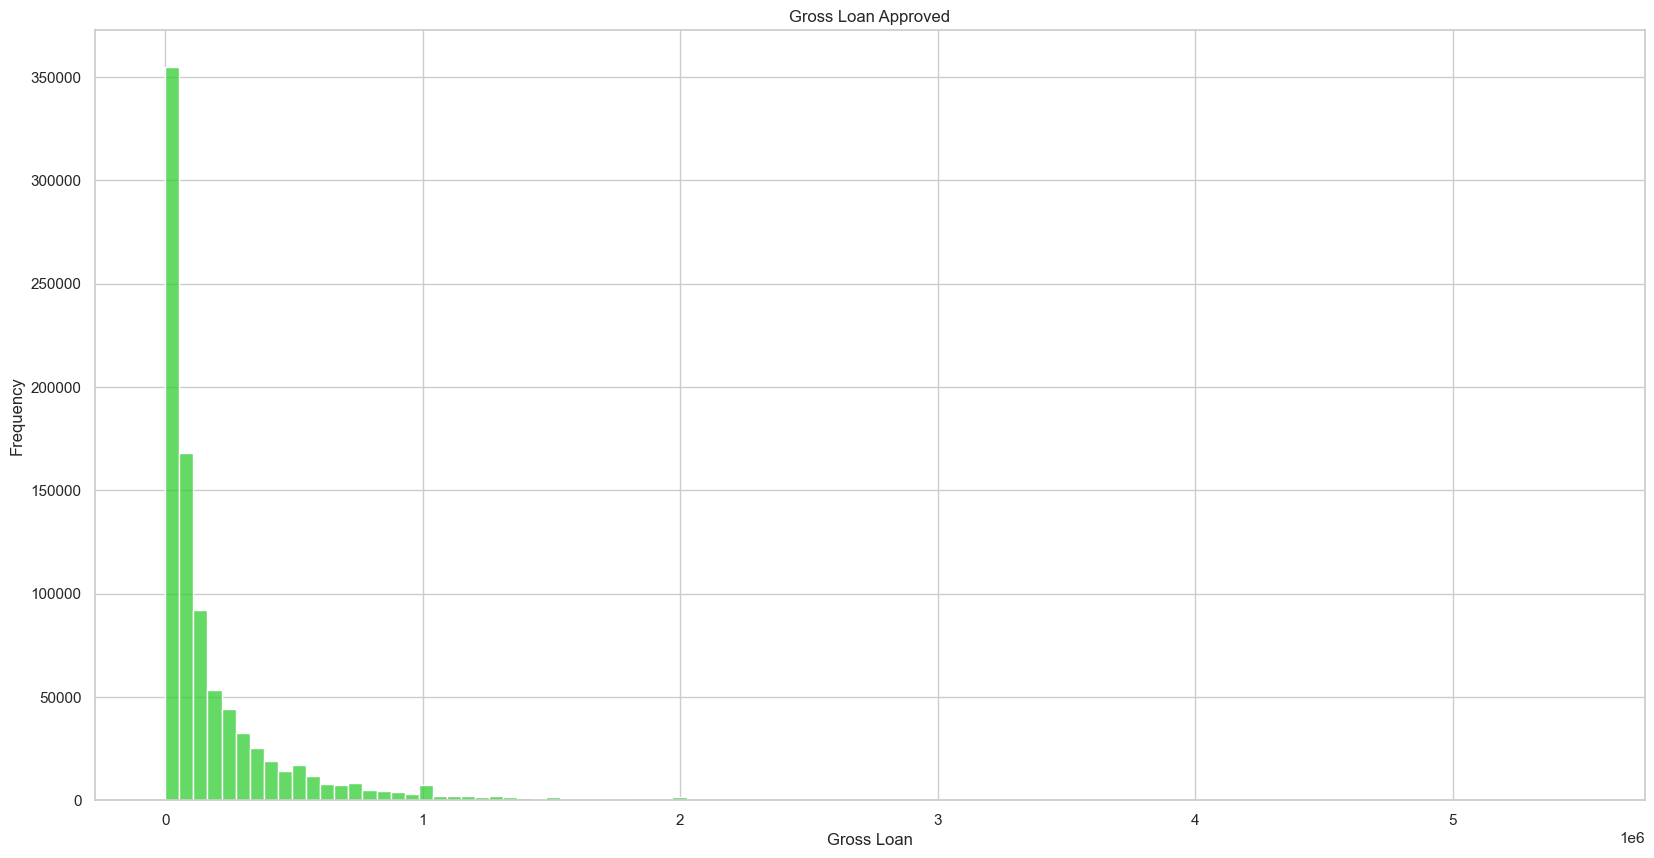

In [84]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.histplot(df_ga["GrAppv"], color="limegreen", bins=100)

plt.title("Gross Loan Approved")
plt.xlabel("Gross Loan")
plt.ylabel("Frequency")
plt.show()

La variable GrAppv es continua y podria ser una feature importante en el modelo predictivo.

## SBA_Appv
Monto garantizado del préstamo aprobado por la SBA.

In [85]:
nvar = df["SBA_Appv"].nunique()
nnan = df["SBA_Appv"].isnull().sum()
pnan = round((nnan / df.shape[0]) * 100, 1)

print(f"Valores Distintos: {nvar}")
print(f"Numero de Nulos: {nnan}")
print(f"Porcentaje de Nulos: {pnan}%")

Valores Distintos: 38326
Numero de Nulos: 0
Porcentaje de Nulos: 0.0%


In [86]:
df_sa = df[["SBA_Appv"]].copy()
df_sa["SBA_Appv"] = df_sa["SBA_Appv"].str.replace(r'[\$,]', '', regex=True).astype(float)
df_sa.sample(3)

,SBA_Appv
270766,75000.0
592848,8500.0
881723,4000.0


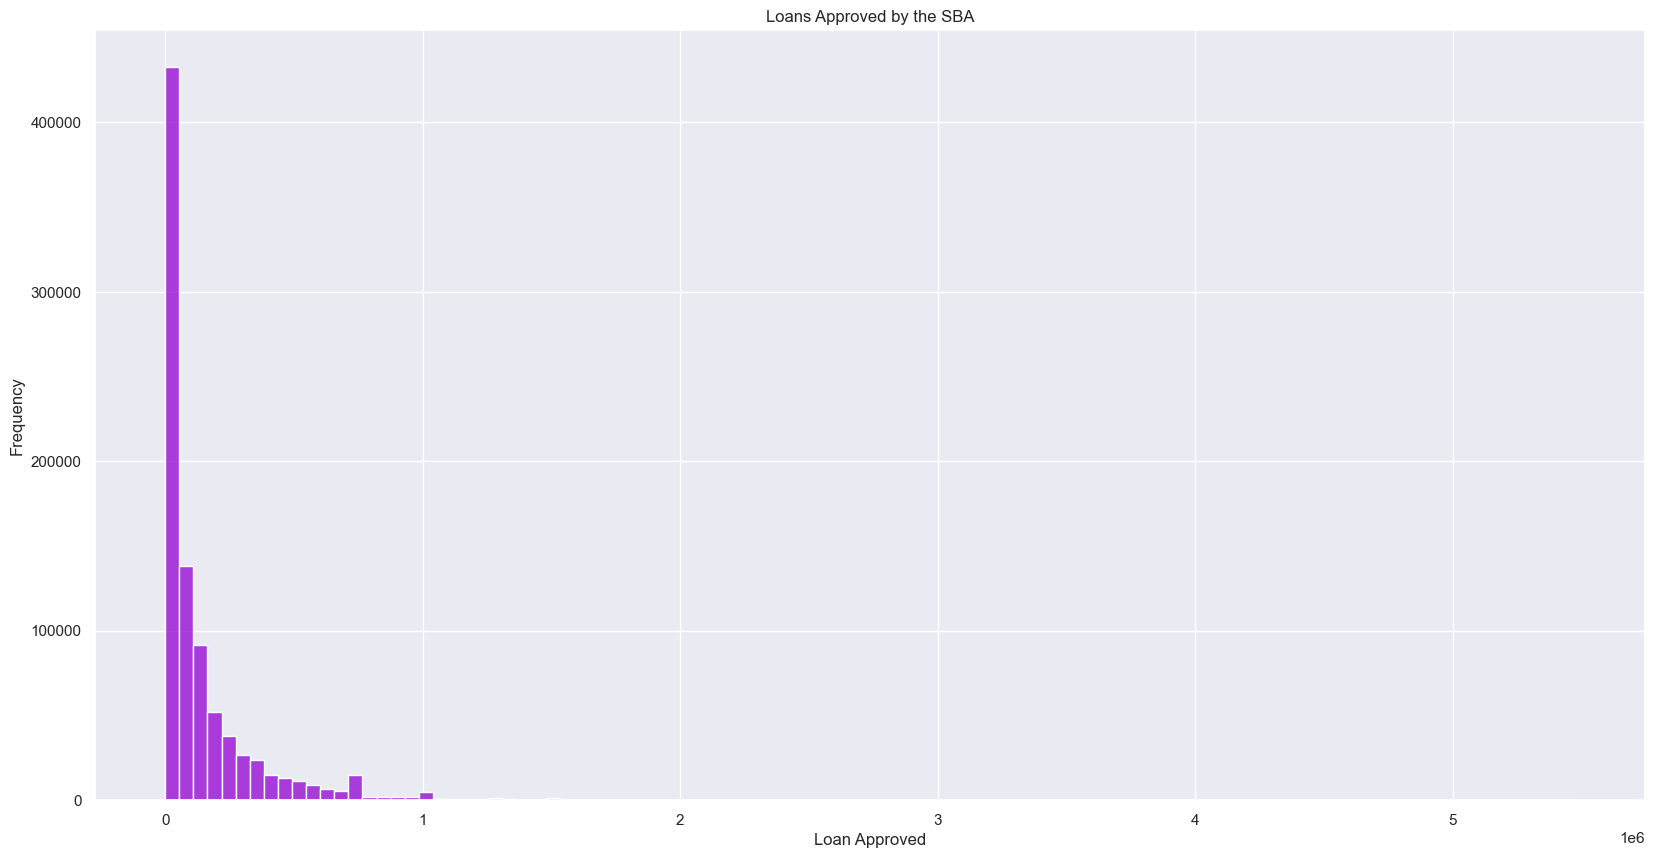

In [87]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.histplot(df_sa["SBA_Appv"], color="darkviolet", bins=100)

plt.title("Loans Approved by the SBA")
plt.xlabel("Loan Approved")
plt.ylabel("Frequency")
plt.show()

La variable SBA_Appv es continua y podria ser una feature importante en el modelo predictivo.

## MIS_Status
Estado del préstamo cancelado = CHGOFF, Pagado en su totalidad = PIF.

In [88]:
nvar = df["MIS_Status"].nunique()
nnan = df["MIS_Status"].isnull().sum()
pnan = round((nnan / df.shape[0]) * 100, 1)

print(f"Valores Distintos: {nvar}")
print(f"Numero de Nulos: {nnan}")
print(f"Porcentaje de Nulos: {pnan}%")

Valores Distintos: 2
Numero de Nulos: 1997
Porcentaje de Nulos: 0.2%


In [89]:
df_mis = df.groupby("MIS_Status")["MIS_Status"].count()
df_mis = df_mis.rename("Count").reset_index()
df_mis = pd.DataFrame(df_mis)

df_mis = df_mis.replace("P I F", "Paid").replace("CHGOFF", "Default")
df_mis["Frequency"] = round((df_mis["Count"] / df.shape[0]) * 100, 1)
df_mis.sort_values("Count", ascending=False).head()

,MIS_Status,Count,Frequency
1,Paid,739609,82.3
0,Default,157558,17.5


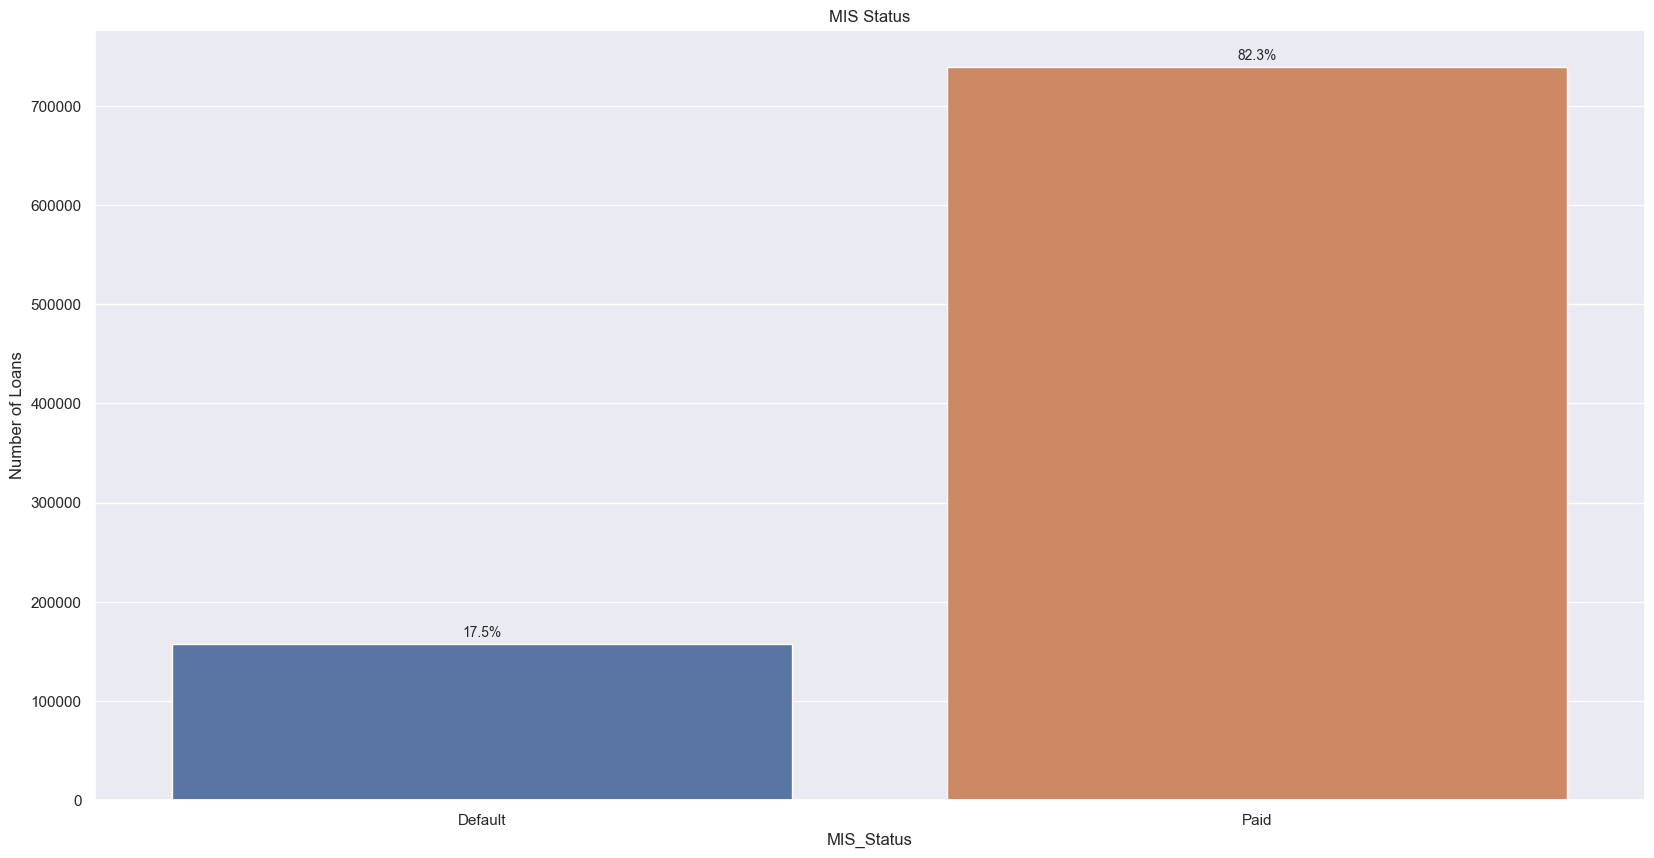

In [90]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")
sns.barplot(data=df_mis, x="MIS_Status", y="Count")

for num in range(len(df_mis)):
    plt.annotate(str(df_mis["Frequency"][num])+"%",
                 xy=(num, df_mis["Count"][num]),
                 xytext=(0, 5), textcoords="offset points", ha="center", size=10)

plt.title("MIS Status")
plt.ylabel("Number of Loans")
plt.show()

La variable MIS_Status indica el estado del prestamo (en mora o pagado en su totalidad) y es la variable objetivo.